In [181]:
import pandas as pd

In [182]:
traces_data= pd.read_csv("/Users/tridhatri/Desktop/intern@crrao/notebook/dataset/mainSimulationAccessTraces.csv")

In [183]:
traces_data.head(100)

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,0,1520031775971,normal
96,tempin6,/agent6/tempin6,/sensorService,Bathroom,/agent6/tempin6,/sensorService,Bathroom,/agent6/tempin6,/sensorService,write,19.6966,1520031778626,normal
97,tempin4,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,Kitchen,/agent4/tempin4,/sensorService,write,19.6209,1520031778646,normal
98,tempin14,/agent14/tempin14,/sensorService,Showerroom,/agent14/tempin14,/sensorService,Showerroom,/agent14/tempin14,/sensorService,registerService,none,1520031781629,normal


In [184]:
traces_data.normality.unique()

array(['normal', 'anomalous(scan)', 'anomalous(malitiousOperation)',
       'anomalous(DoSattack)', 'anomalous(spying)',
       'anomalous(dataProbing)', 'anomalous(wrongSetUp)',
       'anomalous(malitiousControl)'], dtype=object)

In [185]:
# Get the count of missing values in 'Accesed node type' and 'Value'
missing_accesed_node_type = traces_data['accessedNodeType'].isnull().sum()
missing_value = traces_data['value'].isnull().sum()

print(f"Missing values in 'Accesed node type': {missing_accesed_node_type}")
print(f"Missing values in 'Value': {missing_value}")

Missing values in 'Accesed node type': 148
Missing values in 'Value': 2050


In [186]:
# Take a random sample of 50,000 rows
#sampled_data = traces_data.sample(n=50000, random_state=1)
import numpy as np

idx=np.random.randint(0,350000,50000)
sampled_data=traces_data.loc[idx]



## Handle Missing Values

In [187]:
sampled_data.isna().sum()

sourceID                       0
sourceAddress                  0
sourceType                     0
sourceLocation                 0
destinationServiceAddress      0
destinationServiceType         0
destinationLocation            0
accessedNodeAddress            0
accessedNodeType              21
operation                      0
value                        262
timestamp                      0
normality                      0
dtype: int64

In [188]:
sampled_data.accessedNodeType.value_counts()

accessedNodeType
/sensorService      18039
/derived/boolean    13354
/basic/number       12546
/basic/text          5969
/thermostat            47
/basic/composed        17
/lightControler         4
/movementSensor         2
/batteryService         1
Name: count, dtype: int64

In [189]:
# Get the count of missing values in 'Accesed node type' and 'Value'
missing_accesed_node_type = sampled_data['accessedNodeType'].isnull().sum()
missing_value = sampled_data['value'].isnull().sum()

print(f"Missing values in 'Accesed node type': {missing_accesed_node_type}")
print(f"Missing values in 'Value': {missing_value}")

Missing values in 'Accesed node type': 21
Missing values in 'Value': 262


In [190]:
# Replace missing values in 'accessedNodeType' with 'malicious'
sampled_data['accessedNodeType'].fillna('malicious', inplace=True)

# Verify the replacement
print(sampled_data['accessedNodeType'].isnull().sum())  # This should print 0

# Save the cleaned data to a new CSV file if needed
sampled_data.to_csv('cleaned_sampled_data.csv', index=False)

# Print the first few rows to verify the changes
print(sampled_data.head())

0


/var/folders/gt/4b4y5qgn4cx7h6s1nwxzf4hw0000gn/T/ipykernel_36545/1278950077.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





              sourceID            sourceAddress       sourceType  \
62193         tempin22        /agent22/tempin22   /sensorService   
184664        battery6        /agent12/battery6  /batteryService   
125811        tempin27        /agent27/tempin27   /sensorService   
85911         battery5        /agent12/battery5  /batteryService   
289427  lightcontrol27  /agent27/lightcontrol27  /lightControler   

       sourceLocation destinationServiceAddress destinationServiceType  \
62193          room_3         /agent22/tempin22         /sensorService   
184664       Entrance         /agent12/battery6        /batteryService   
125811         room_8         /agent27/tempin27         /sensorService   
85911        Entrance         /agent12/battery5        /batteryService   
289427         room_8       /agent27/movement27        /movementSensor   

       destinationLocation           accessedNodeAddress  accessedNodeType  \
62193               room_3             /agent22/tempin22    /sensorS

In [191]:
# Define the mapping dictionary
value_mapping = {
    'True': 1.0,
    'False': -1.0,
    'Twenty': 20.0,
    'Null': 0.0  # Assuming 'Null' should map to 0.0
}

# Apply the mapping only to non-numeric values in the 'value' column
sampled_data['value'] = sampled_data['value'].apply(lambda x: value_mapping[x] if x in value_mapping else x)

# Convert the 'value' column to numeric (coerce errors to NaN)
sampled_data['value'] = pd.to_numeric(sampled_data['value'], errors='coerce')

# Print the first few rows to verify the conversion
print(sampled_data.head())

              sourceID            sourceAddress       sourceType  \
62193         tempin22        /agent22/tempin22   /sensorService   
184664        battery6        /agent12/battery6  /batteryService   
125811        tempin27        /agent27/tempin27   /sensorService   
85911         battery5        /agent12/battery5  /batteryService   
289427  lightcontrol27  /agent27/lightcontrol27  /lightControler   

       sourceLocation destinationServiceAddress destinationServiceType  \
62193          room_3         /agent22/tempin22         /sensorService   
184664       Entrance         /agent12/battery6        /batteryService   
125811         room_8         /agent27/tempin27         /sensorService   
85911        Entrance         /agent12/battery5        /batteryService   
289427         room_8       /agent27/movement27        /movementSensor   

       destinationLocation           accessedNodeAddress  accessedNodeType  \
62193               room_3             /agent22/tempin22    /sensorS

In [192]:
# Check the data type of the 'value' column
value_column_dtype = sampled_data['value'].dtype

# Print the data type and check if it's object (indicating strings)
print(f"Data type of 'value' column: {value_column_dtype}")

Data type of 'value' column: float64


In [193]:
sampled_data.isna().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType                0
operation                       0
value                        6026
timestamp                       0
normality                       0
dtype: int64

## Dealing with Normality column

In [194]:
# Count occurrences of each unique value in 'normality' column
normality_counts = sampled_data['normality'].value_counts()

# Calculate percentages
normality_percentages = (normality_counts / len(sampled_data)) * 100

# Combine counts and percentages into a DataFrame for display
normality_summary = pd.DataFrame({'Count': normality_counts, 'Percentage': normality_percentages})

# Display the summary
print("Value counts and percentages of 'normality' column:")
print(normality_summary)

Value counts and percentages of 'normality' column:
                               Count  Percentage
normality                                       
normal                         48619      97.238
anomalous(DoSattack)             781       1.562
anomalous(scan)                  228       0.456
anomalous(malitiousControl)      119       0.238
anomalous(malitiousOperation)    118       0.236
anomalous(spying)                 68       0.136
anomalous(dataProbing)            48       0.096
anomalous(wrongSetUp)             19       0.038


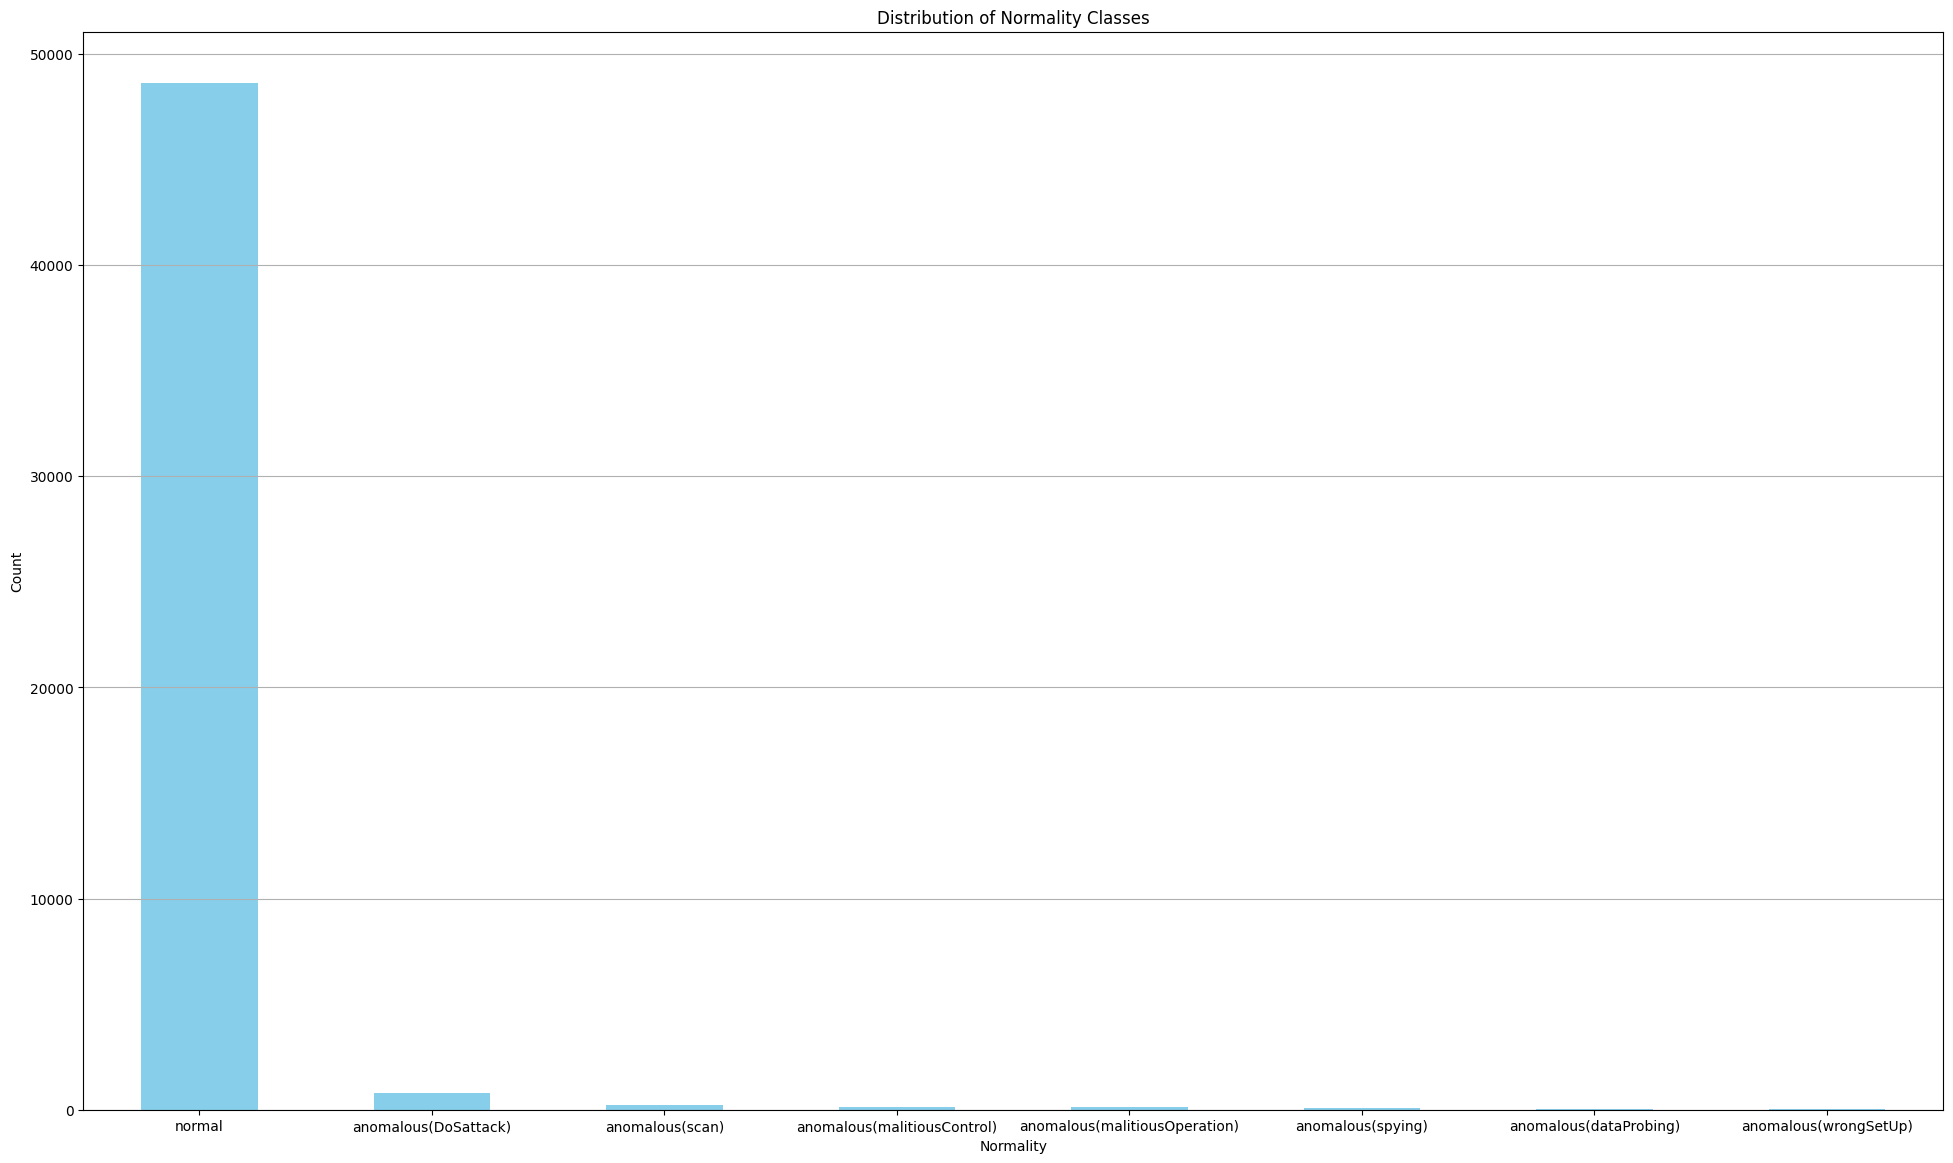

In [195]:
import matplotlib.pyplot as plt

# Example: Plotting value counts of 'normality' column
plt.figure(figsize=(24, 14))
sampled_data['normality'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Normality Classes')
plt.xlabel('Normality')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


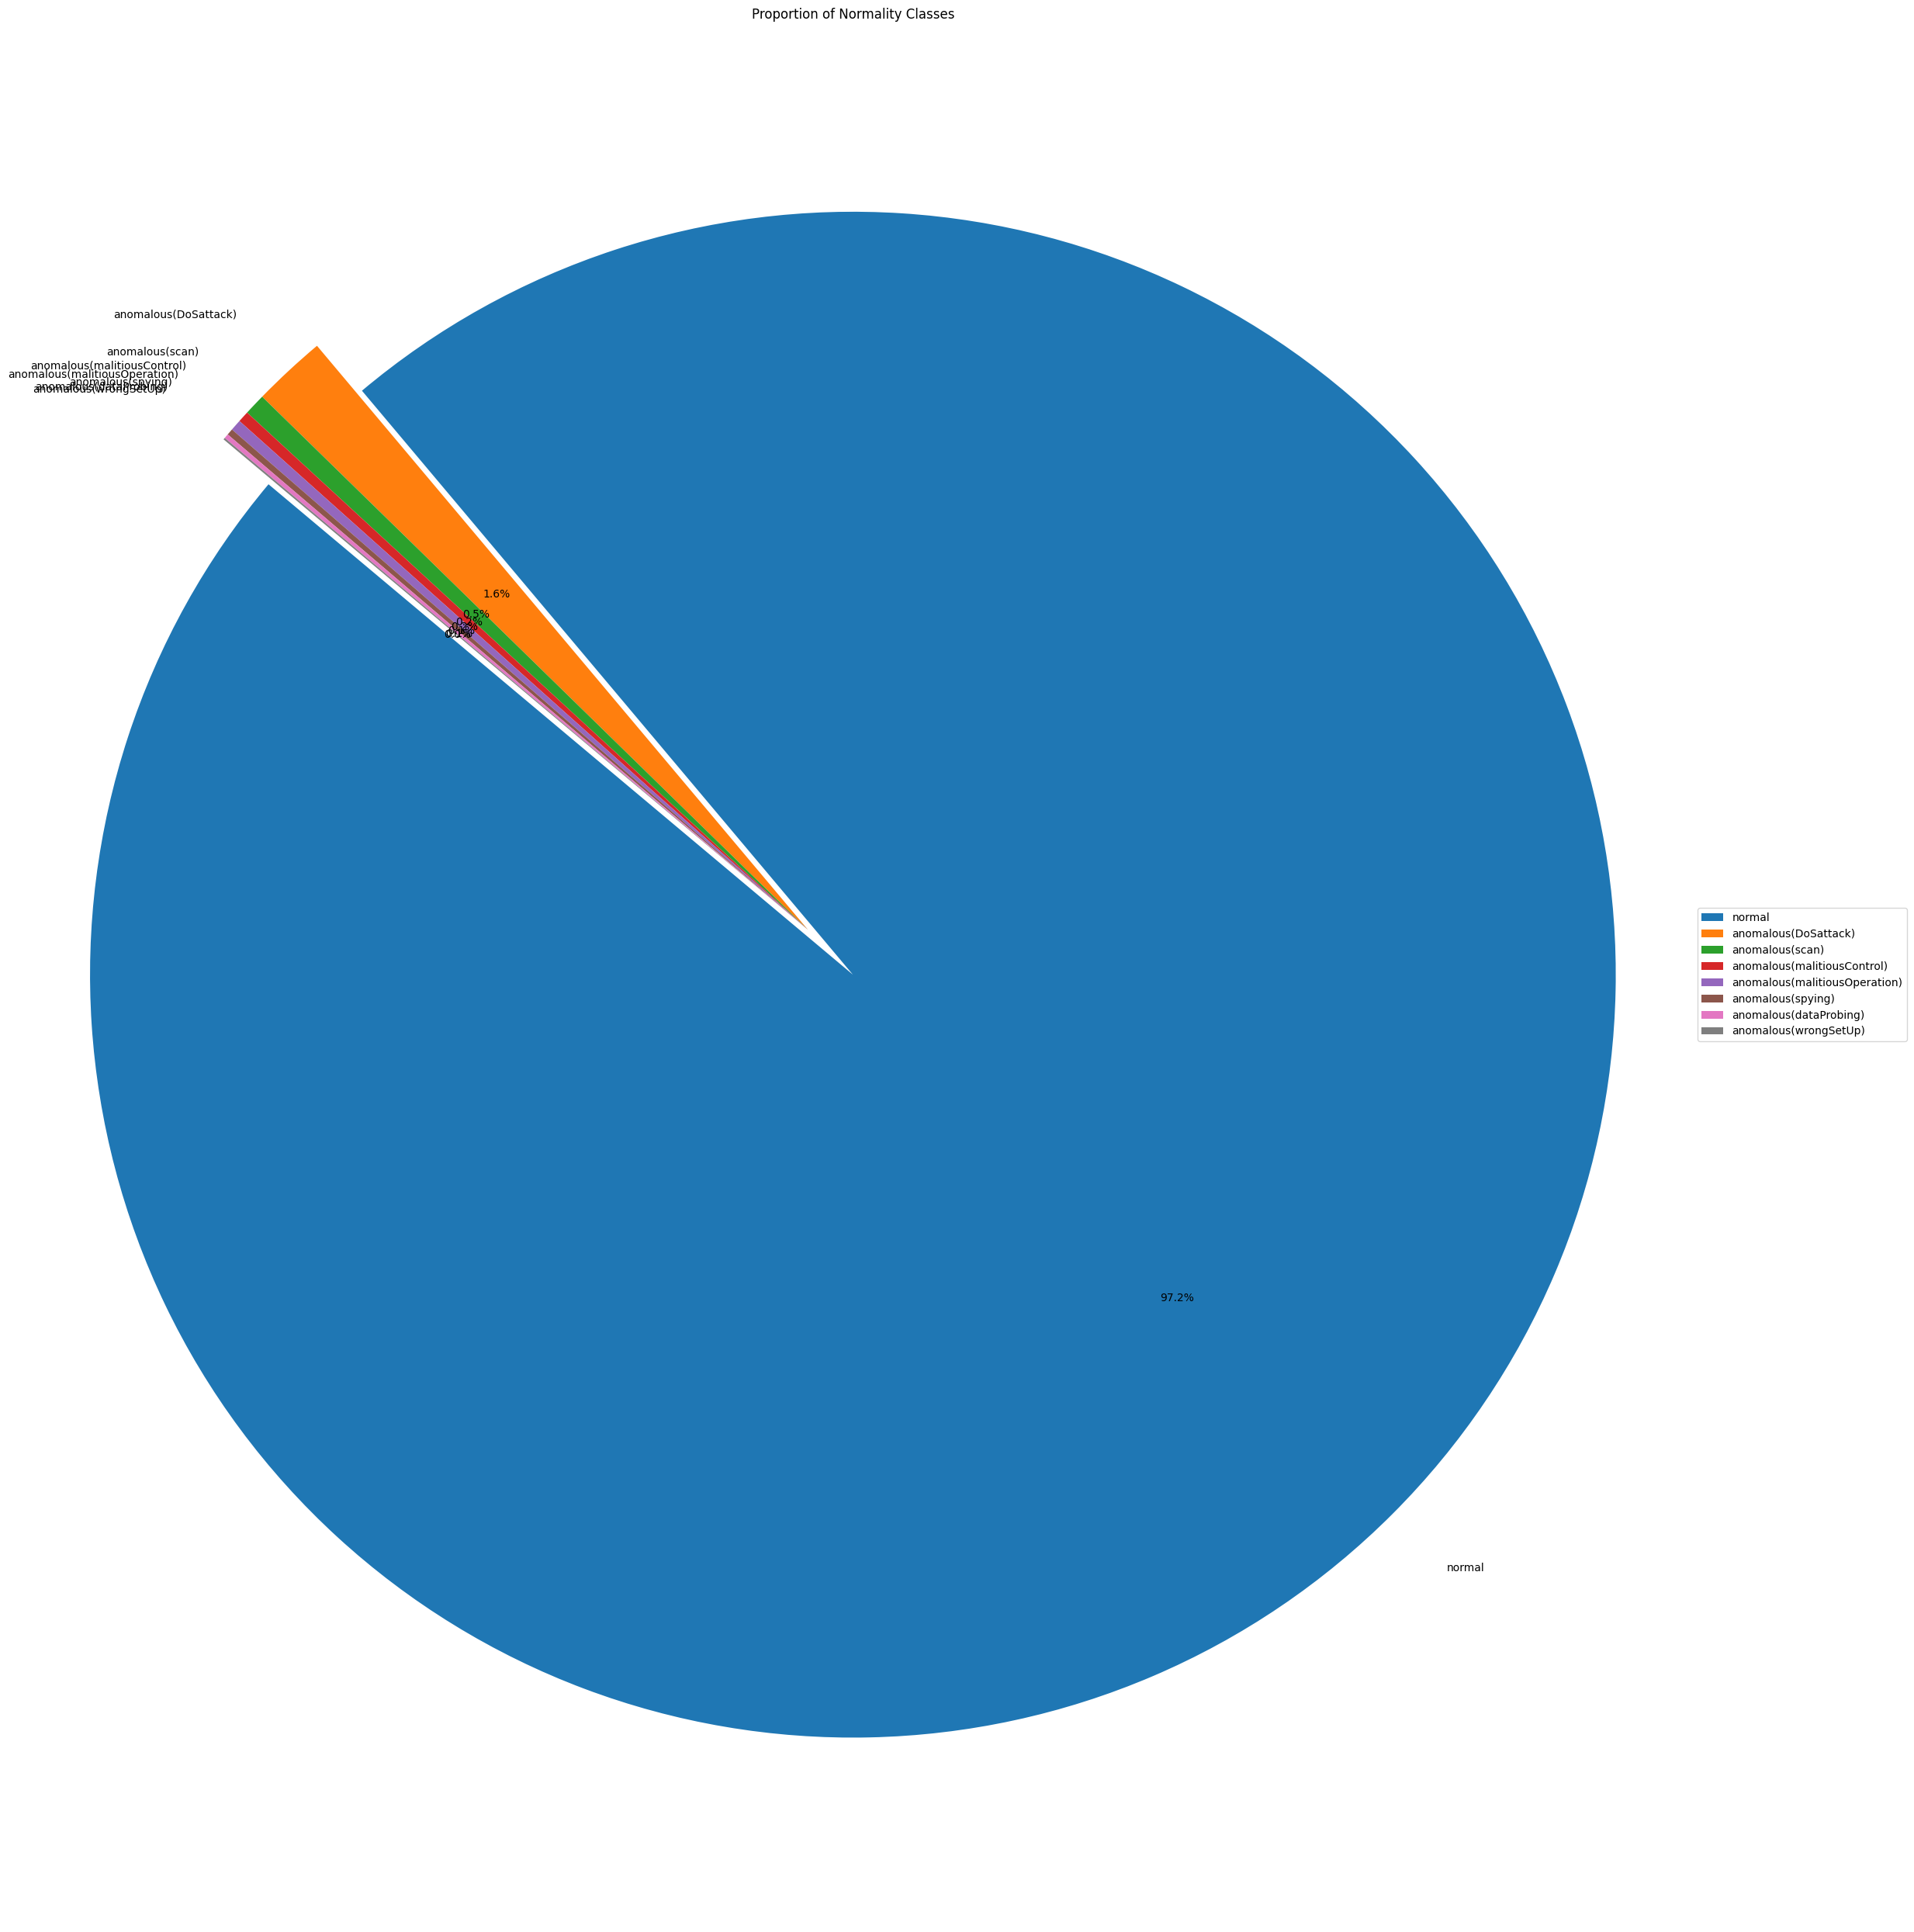

In [196]:
# Calculate value counts of 'normality' column
normality_counts = sampled_data['normality'].value_counts()

# Define explode values to emphasize certain slices
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # Adjust as needed

# Plotting pie chart of 'normality' column with larger slices and legends beside the chart
plt.figure(figsize=(25, 25))
plt.pie(normality_counts, labels=normality_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, radius=1.2)
plt.title('Proportion of Normality Classes')
plt.axis('equal')

# Adding legends beside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

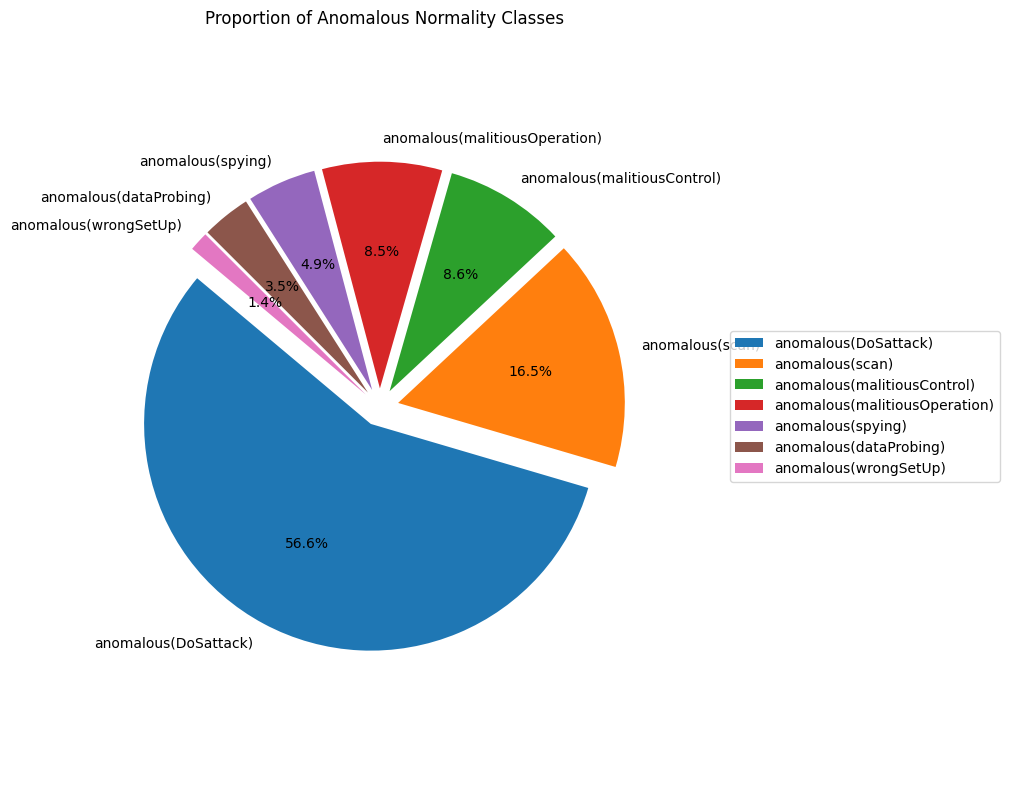

In [197]:
# Filter out 'normal' class
anomalous_data = sampled_data[sampled_data['normality'] != 'normal']

# Calculate value counts of 'normality' column excluding 'normal'
anomalous_counts = anomalous_data['normality'].value_counts()

# Define explode values to emphasize certain slices (optional)
explode = (0.1,) * len(anomalous_counts)  # Adjust as needed

# Plotting pie chart of 'normality' column excluding 'normal' with larger slices and legends beside the chart
plt.figure(figsize=(10, 8))
plt.pie(anomalous_counts, labels=anomalous_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, radius=1.2)
plt.title('Proportion of Anomalous Normality Classes')
plt.axis('equal')

# Adding legends beside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

In [198]:
# Calculate value counts of 'normality' column
normality_counts = sampled_data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
normal: 97.238%
anomalous(DoSattack): 1.562%
anomalous(scan): 0.456%
anomalous(malitiousControl): 0.238%
anomalous(malitiousOperation): 0.236%
anomalous(spying): 0.136%
anomalous(dataProbing): 0.096%
anomalous(wrongSetUp): 0.038%


## Bar Chart of Anomalous Values

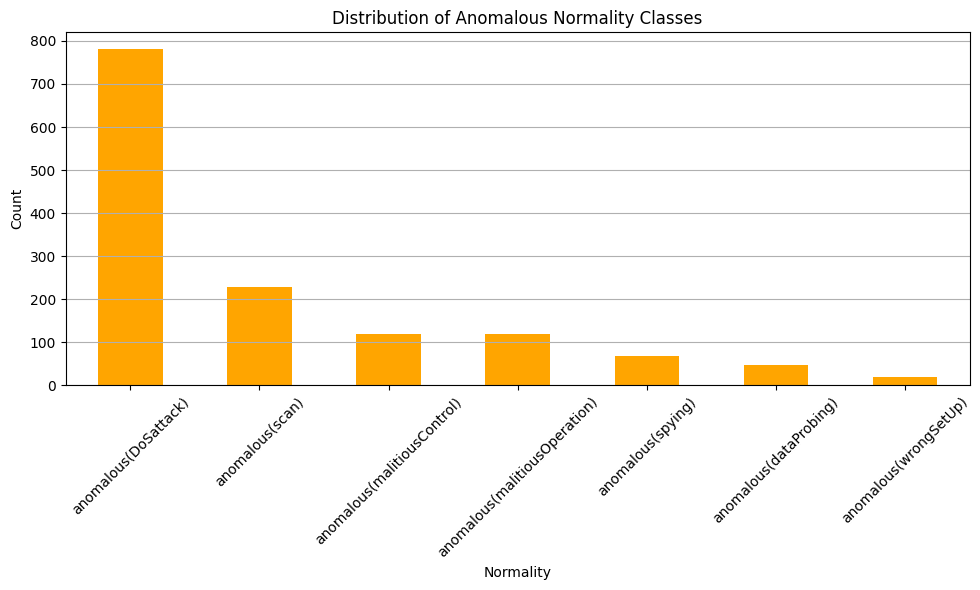

In [199]:
import matplotlib.pyplot as plt


# Filter out 'normal' category
anomalous_data = sampled_data[sampled_data['normality'] != 'normal']

# Calculate value counts of 'normality' column for anomalous values
anomalous_counts = anomalous_data['normality'].value_counts()

# Plotting bar chart of anomalous values
plt.figure(figsize=(10, 6))
anomalous_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Anomalous Normality Classes')
plt.xlabel('Normality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


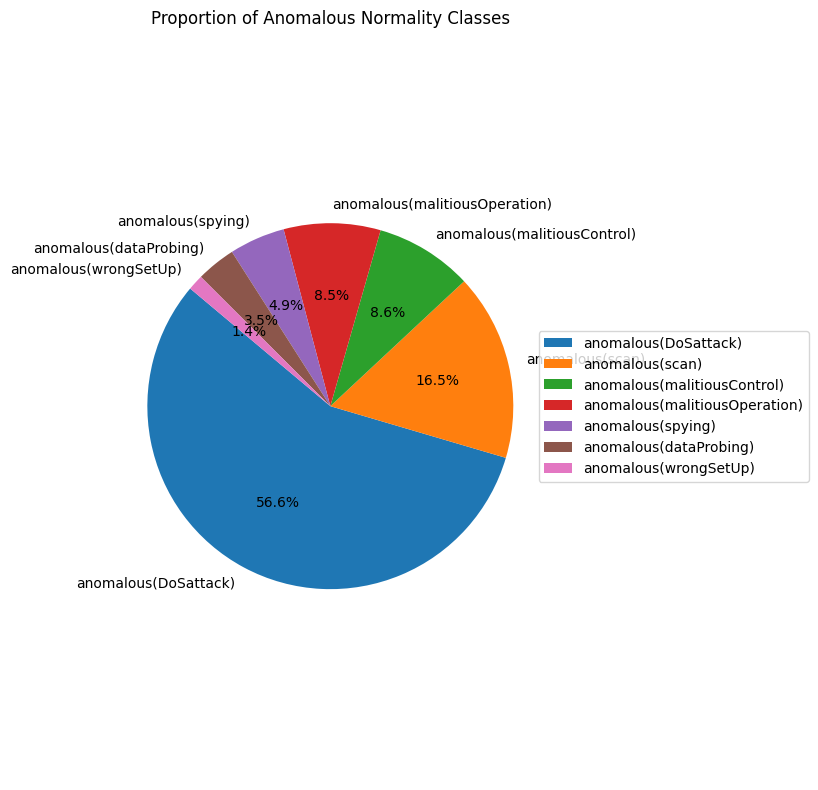

In [200]:
# Plotting pie chart of anomalous values
plt.figure(figsize=(8, 8))
plt.pie(anomalous_counts, labels=anomalous_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Anomalous Normality Classes')
plt.axis('equal')

# Adding legends beside the pie chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()

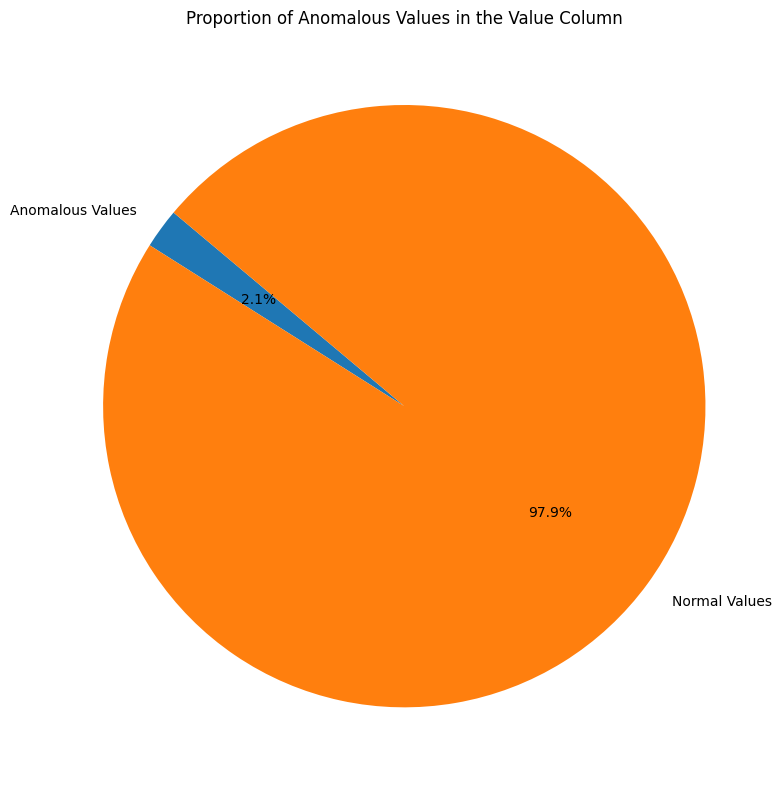

In [201]:
# Filter out rows with anomalous values based on 'normality' column
anomalous_values = sampled_data[sampled_data['normality'] != 'normal']['value']

# Calculate total count of 'value' column
total_values = sampled_data['value']

# Calculate proportions of anomalous values relative to total values
anomalous_percentage = (anomalous_values.count() / total_values.count()) * 100

# Plotting pie chart of anomalous values relative to total values
plt.figure(figsize=(8, 8))
plt.pie([anomalous_percentage, 100 - anomalous_percentage], labels=['Anomalous Values', 'Normal Values'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Anomalous Values in the Value Column')
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

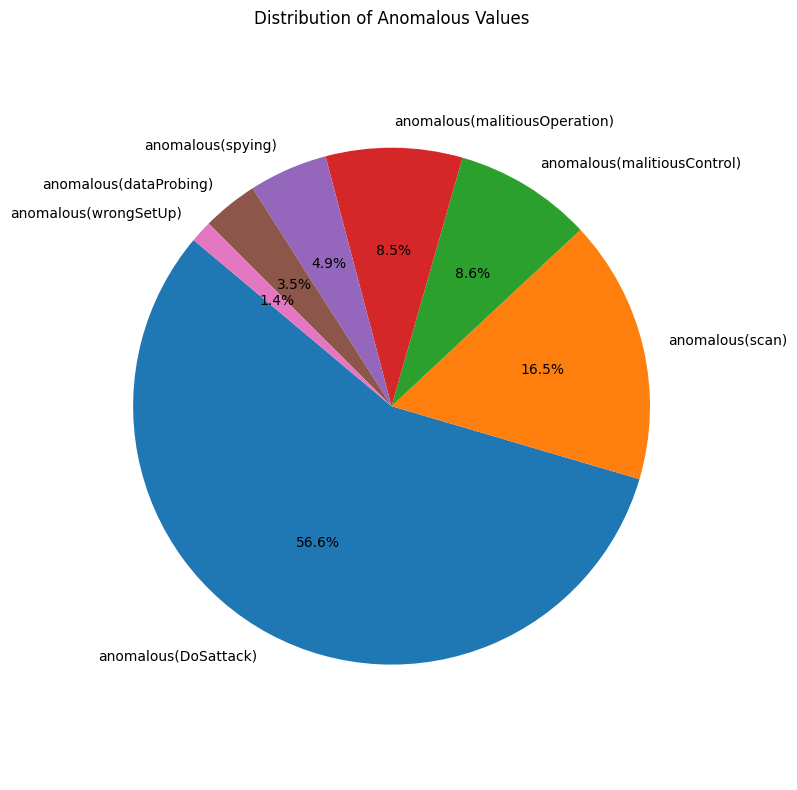

In [202]:
# Filter out rows with anomalous values based on 'normality' column
anomalous_data = sampled_data[sampled_data['normality'] != 'normal']

# Calculate total count of 'value' column
total_values_count = sampled_data['value'].count()

# Calculate count of anomalous values
anomalous_values_count = anomalous_data['value'].count()

# Calculate percentages of each type of anomaly relative to total 'value' column
anomaly_counts = anomalous_data['normality'].value_counts()
anomaly_percentages = anomaly_counts / total_values_count * 100

# Plotting pie chart of distribution of anomalous values
plt.figure(figsize=(8, 8))
plt.pie(anomaly_percentages, labels=anomaly_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Anomalous Values')
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

## Populating the missing values with mode value

In [203]:
import pandas as pd

# # Assuming 'sampled_data' is your DataFrame
# # Identify columns with missing values
# columns_with_missing = sampled_data.columns[sampled_data.isnull().any()]

# # Calculate mode for each column
# modes = sampled_data[columns_with_missing].mode().iloc[0]

# # Fill missing values with mode values
# sampled_data = sampled_data.fillna(modes)

# Verify if missing values are filled
#sampled_data=sampled_data.drop('value',axis=1)
sampled_data.columns
#print(sampled_data.isnull().sum())


Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp', 'normality'],
      dtype='object')

## LABEL ENCODING


In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Assuming 'target_variable' is your target column name
target_variable = 'normality'

# Encode categorical target variable into numerical format (if needed)

for col in sampled_data.columns:
    le = LabelEncoder()
    sampled_data[col] = le.fit_transform(sampled_data[col])
    

sampled_data.head()


,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
62193,67,42,4,14,40,4,14,56,7,4,6070,8271,7
184664,5,16,0,5,14,0,5,20,1,1,15,24422,7
125811,72,58,4,19,56,4,19,77,7,4,5675,16692,7
85911,4,15,0,5,13,0,5,18,1,1,2,11511,7
289427,27,56,2,19,55,3,19,76,4,1,0,38028,7


## Checking the classes after encoding

In [205]:
import pandas as pd

# Assuming sampled_data is already encoded
encoded_normality = sampled_data['normality']

# Get the unique values from the encoded normality column
unique_encoded_values = encoded_normality.unique()

# Print the unique encoded values
print("Unique encoded values in 'normality' column:")
print(unique_encoded_values)

# Original value counts before encoding
original_value_counts = {
    'normal': 97.342,
    'anomalous(DoSattack)': 1.560,
    'anomalous(scan)': 0.372,
    'anomalous(malitiousControl)': 0.216,
    'anomalous(malitiousOperation)': 0.198,
    'anomalous(spying)': 0.172,
    'anomalous(dataProbing)': 0.112,
    'anomalous(wrongSetUp)': 0.028
}

# Create a dictionary to store the mapping
mapping = {}

# Iterate over the unique encoded values and map them to the original labels
for encoded_value in unique_encoded_values:
    # Get the percentage of the encoded value
    percentage = (encoded_normality == encoded_value).mean() * 100

    # Find the closest matching original label
    closest_label = min(original_value_counts.keys(), key=lambda k: abs(original_value_counts[k] - percentage))

    # Store the mapping
    mapping[encoded_value] = closest_label

# Print the mapping
print("\nMapping of encoded values to original labels:")
for encoded_value, original_label in mapping.items():
    print(f"{encoded_value}: {original_label}")


Unique encoded values in 'normality' column:
[7 0 2 4 5 3 6 1]

Mapping of encoded values to original labels:
7: normal
0: anomalous(DoSattack)
2: anomalous(malitiousControl)
4: anomalous(scan)
5: anomalous(dataProbing)
3: anomalous(malitiousControl)
6: anomalous(wrongSetUp)
1: anomalous(dataProbing)


## CORRELATIONS

In [206]:
import pandas as pd

# Assuming 'sampled_data' is your DataFrame
# Select only numeric columns
numeric_columns = sampled_data.select_dtypes(include=['int', 'float']).columns

# Calculate correlations for numeric columns
correlation_matrix = sampled_data[numeric_columns].corr()

# Print correlation matrix
print(correlation_matrix)


                           sourceID  sourceAddress  sourceType  \
sourceID                   1.000000       0.144255    0.892361   
sourceAddress              0.144255       1.000000    0.038996   
sourceType                 0.892361       0.038996    1.000000   
sourceLocation             0.086472      -0.036640   -0.008248   
destinationServiceAddress  0.070900       0.984966   -0.038116   
destinationServiceType     0.211263       0.012917    0.117474   
destinationLocation        0.117129       0.064356    0.026725   
accessedNodeAddress        0.069956       0.983897   -0.037680   
accessedNodeType           0.306860       0.046932    0.155226   
operation                  0.564140       0.039389    0.332033   
value                      0.181796       0.035081    0.119737   
timestamp                 -0.045285       0.011912   -0.014617   
normality                  0.077809       0.070428   -0.120454   

                           sourceLocation  destinationServiceAddress  \
sou

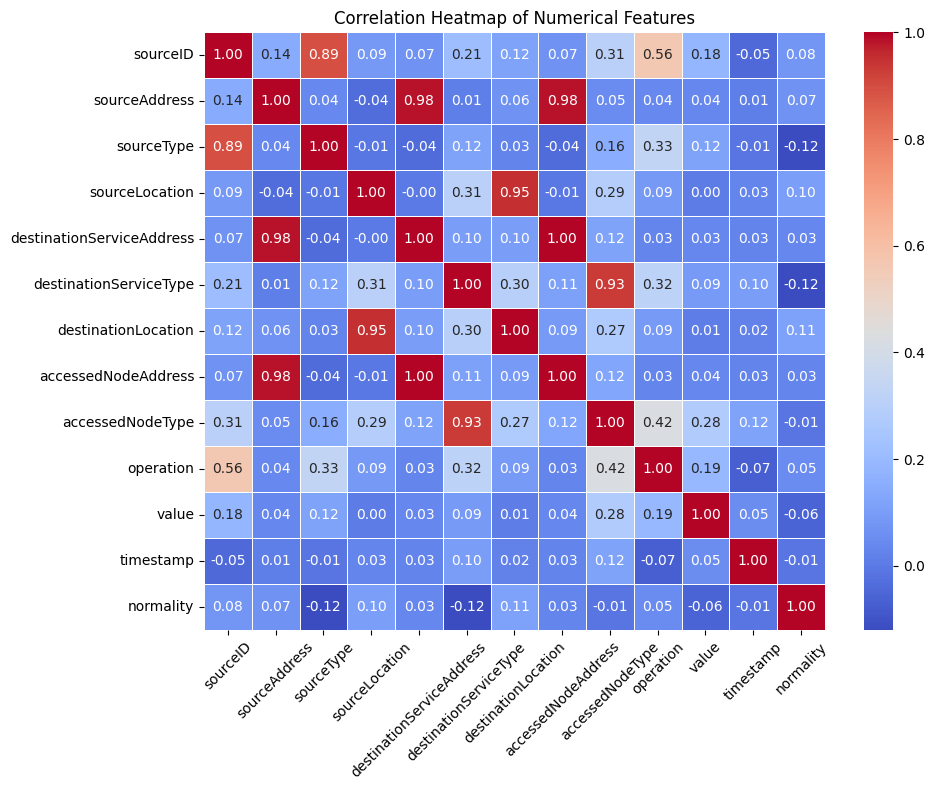

In [207]:
# Select numeric columns
numeric_columns = sampled_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plotting heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [208]:
sampled_data=sampled_data.drop(['sourceAddress','accessedNodeAddress','destinationServiceAddress'],axis=1)
sampled_data.head()

,sourceID,sourceType,sourceLocation,destinationServiceType,destinationLocation,accessedNodeType,operation,value,timestamp,normality
62193,67,4,14,4,14,7,4,6070,8271,7
184664,5,0,5,0,5,1,1,15,24422,7
125811,72,4,19,4,19,7,4,5675,16692,7
85911,4,0,5,0,5,1,1,2,11511,7
289427,27,2,19,3,19,4,1,0,38028,7


## EXPORT THE current state if sampled_data into cleaned_data

In [209]:
# Assuming 'sampled_data' is your DataFrame

sampled_data.to_csv('cleaned_data.csv', index=False)

## Import the cleaned-data

In [210]:
import pandas as pd
real_data = pd.read_csv("cleaned_data.csv")

In [211]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 'target_variable' is your target column name
target_variable = 'normality'

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns
X = real_data.drop(columns=[target_variable])
y = real_data[target_variable]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision  Recall
0     Logistic Regression    0.9718   0.944395  0.9718
1             Naive Bayes    0.9721   0.978505  0.9721
2           Decision Tree    0.9995   0.999533  0.9995
3           Random Forest    1.0000   1.000000  1.0000
4                AdaBoost    0.9763   0.964564  0.9763
5       Gradient Boosting    0.9987   0.998751  0.9987
6     K-Nearest Neighbors    0.9924   0.990429  0.9924
7  Support Vector Machine    0.9718   0.944395  0.9718
8          SGD Classifier    0.9629   0.944149  0.9629
9      Bagging Classifier    0.9996   0.999636  0.9996


In [212]:

# For suimulation purpose 
X_simulation=pd.concat([X_train,y_train],axis=1)
X_simulation.normality.value_counts()
#X_simulation.head()

normality
7    38901
0      622
4      181
2       99
3       93
5       52
1       38
6       14
Name: count, dtype: int64

## NOw LET US APPLY THE SDV MODULE ON THIS DATA FRAME

In [213]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.




## extracting the Metadata from dataframes

In [214]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(X_simulation)
metadata


{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "sourceID": {
            "sdtype": "numerical"
        },
        "sourceType": {
            "sdtype": "categorical"
        },
        "sourceLocation": {
            "sdtype": "numerical"
        },
        "destinationServiceType": {
            "sdtype": "categorical"
        },
        "destinationLocation": {
            "sdtype": "numerical"
        },
        "accessedNodeType": {
            "sdtype": "categorical"
        },
        "operation": {
            "sdtype": "categorical"
        },
        "value": {
            "sdtype": "numerical"
        },
        "timestamp": {
            "sdtype": "numerical"
        },
        "normality": {
            "sdtype": "categorical"
        }
    }
}

## APPLYING GaussianCopula

In [215]:
from sdv.single_table import GaussianCopulaSynthesizer


synthesizer1 = GaussianCopulaSynthesizer(metadata)
synthetic_data1 = synthesizer1.fit(X_simulation[X_simulation.normality!=7])

#synthesizer2 = GaussianCopulaSynthesizer(metadata)
#synthetic_data2 = synthesizer2.fit(real_data[real_data.normality==7])



/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:134: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



In [216]:
X_simulation.shape

(40000, 10)

In [217]:
synthetic_data1 = synthesizer1.sample(num_rows=25000)
#synthetic_data2 = synthesizer2.sample(num_rows=100)

#synthetic_data1=pd.concat([synthetic_data1,synthetic_data2],axis=0,ignore_index=True)
#synthetic_data1.head()

In [218]:
from sdv.evaluation.single_table import evaluate_quality

quality_report1 = evaluate_quality(
    real_data,
    synthetic_data1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 119.94it/s]|
Column Shapes Score: 62.08%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 310.96it/s]|
Column Pair Trends Score: 33.1%

Overall Score (Average): 47.59%



In [219]:
quality_report1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.59048
1,sourceType,TVComplement,0.56222
2,sourceLocation,KSComplement,0.68144
3,destinationServiceType,TVComplement,0.60990
4,destinationLocation,KSComplement,0.56046
5,accessedNodeType,TVComplement,0.68092
6,operation,TVComplement,0.89874
7,value,KSComplement,0.71140
8,timestamp,KSComplement,0.88522
9,normality,TVComplement,0.02762


In [220]:
def calculate_statistics(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    mean_values = numeric_df.mean()
    median_values = numeric_df.median()
    mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, so take the first row

    return mean_values, median_values, mode_values

def create_summary_table(df, dataset_name):
    mean, median, mode = calculate_statistics(df)

    summary_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Mode': mode
    })

    summary_df.index.name = dataset_name
    return summary_df



# Create summary tables for real data
summary_table_real1 = create_summary_table(X_simulation, 'real_data')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data1, 'synthetic_data1')


# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])


# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)

# print("\nCombined Summary Table for Dataset 2")
# print(summary_table_combined2)

# print("\nCombined Summary Table for Dataset 3")
# print(summary_table_combined3)

Combined Summary Table for Dataset 1
                                          Mean   Median    Mode
          real_data                                            
Real      sourceID                   36.691025     27.0    79.0
          sourceType                  2.764525      2.0     2.0
          sourceLocation              8.582350      8.0     6.0
          destinationServiceType      2.282900      3.0     0.0
          destinationLocation         8.683900      7.0     6.0
          accessedNodeType            4.097125      4.0     7.0
          operation                   1.923050      1.0     1.0
          value                    2390.749700     16.0     1.0
          timestamp               23043.109250  23101.5  3619.0
          normality                   6.847250      7.0     7.0
Synthetic sourceID                   24.400880      3.0     3.0
          sourceType                  4.275440      4.0     6.0
          sourceLocation              6.511640      4.0     0.0
   

In [221]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=X_simulation,
    synthetic_data=synthetic_data1,
    column_name='normality',
    metadata=metadata
)

fig.show()

In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score




# Assuming 'target_variable' is your target column name
target_variable = 'normality'

# Encode categorical target variable into numerical format (if needed)
#le = LabelEncoder()
#real_data[target_variable] = le.fit_transform(real_data[target_variable])
#synthetic_data1[target_variable] = le.transform(synthetic_data1[target_variable])

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns
X_real = real_data.drop(columns=['normality'])
y_real = real_data[target_variable]

X_synthetic = synthetic_data1.drop(columns=[ 'normality'])
y_synthetic = synthetic_data1[target_variable]

# Split data into training and testing sets (80% training, 20% testing)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
X_train_synthetic, X_test_synthetic, y_train_synthetic, y_test_synthetic = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate on real data
model.fit(X_train_real, y_train_real)
y_pred_real = model.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)
precision_real = precision_score(y_test_real, y_pred_real, average='weighted', zero_division=0)
recall_real = recall_score(y_test_real, y_pred_real, average='weighted', zero_division=0)

# Train and evaluate on synthetic data
model.fit(X_train_synthetic, y_train_synthetic)
y_pred_synthetic = model.predict(X_test_synthetic)
accuracy_synthetic = accuracy_score(y_test_synthetic, y_pred_synthetic)
precision_synthetic = precision_score(y_test_synthetic, y_pred_synthetic, average='weighted', zero_division=0)
recall_synthetic = recall_score(y_test_synthetic, y_pred_synthetic, average='weighted', zero_division=0)

# Print results in a tabular format
results = {
    'Data Type': ['Real Data', 'Synthetic Data'],
    'Accuracy': [accuracy_real, accuracy_synthetic],
    'Precision': [precision_real, precision_synthetic],
    'Recall': [recall_real, recall_synthetic]
}

results_df = pd.DataFrame(results)
print(results_df)

        Data Type  Accuracy  Precision  Recall
0       Real Data    0.9997   0.999731  0.9997
1  Synthetic Data    0.5046   0.428465  0.5046


## Concatenating the X_simulation data and the newly generated synthetic data into 'data'

In [223]:
data=pd.concat([X_simulation,synthetic_data1],axis=0)
synthetic_data1.shape
#data.shape
#X_simulation.shape

(25000, 10)

In [224]:
# Ashutosh

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns


X = data.drop(columns=['normality'])
y = data[target_variable]



# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.587000   0.441370  0.587000
1             Naive Bayes  0.675154   0.616717  0.675154
2           Decision Tree  0.762231   0.765096  0.762231
3           Random Forest  0.821846   0.799922  0.821846
4                AdaBoost  0.751000   0.641744  0.751000
5       Gradient Boosting  0.820769   0.806524  0.820769
6     K-Nearest Neighbors  0.601308   0.536155  0.601308
7  Support Vector Machine  0.592923   0.351558  0.592923
8          SGD Classifier  0.099462   0.449507  0.099462
9      Bagging Classifier  0.804385   0.778579  0.804385


In [225]:
y_real

0        7
1        7
2        7
3        7
4        7
        ..
49995    7
49996    7
49997    7
49998    7
49999    0
Name: normality, Length: 50000, dtype: int64

## Unique encoded values in 'normality' column:
[7 0 3 5 1 4 2 6]

Mapping of encoded values to original labels:

7: normal 

0: anomalous(DoSattack) 

3: anomalous(malitiousOperation) 

5: anomalous(spying)

1: anomalous(dataProbing)

4: anomalous(scan)

2: anomalous(malitiousControl)

6: anomalous(wrongSetUp)


## Percentages of values in the 'normality' column In the real data:
normal: 97.342%

anomalous(DoSattack): 1.560%

anomalous(scan): 0.372%

anomalous(malitiousControl): 0.216%

anomalous(malitiousOperation): 0.198%

anomalous(spying): 0.172%

anomalous(dataProbing): 0.112%

anomalous(wrongSetUp): 0.028%

Percentages of values in the 'normality' column:
0: 27.244%
4: 9.000%
2: 4.450%
3: 4.348%
5: 2.206%
1: 2.060%
6: 0.692%


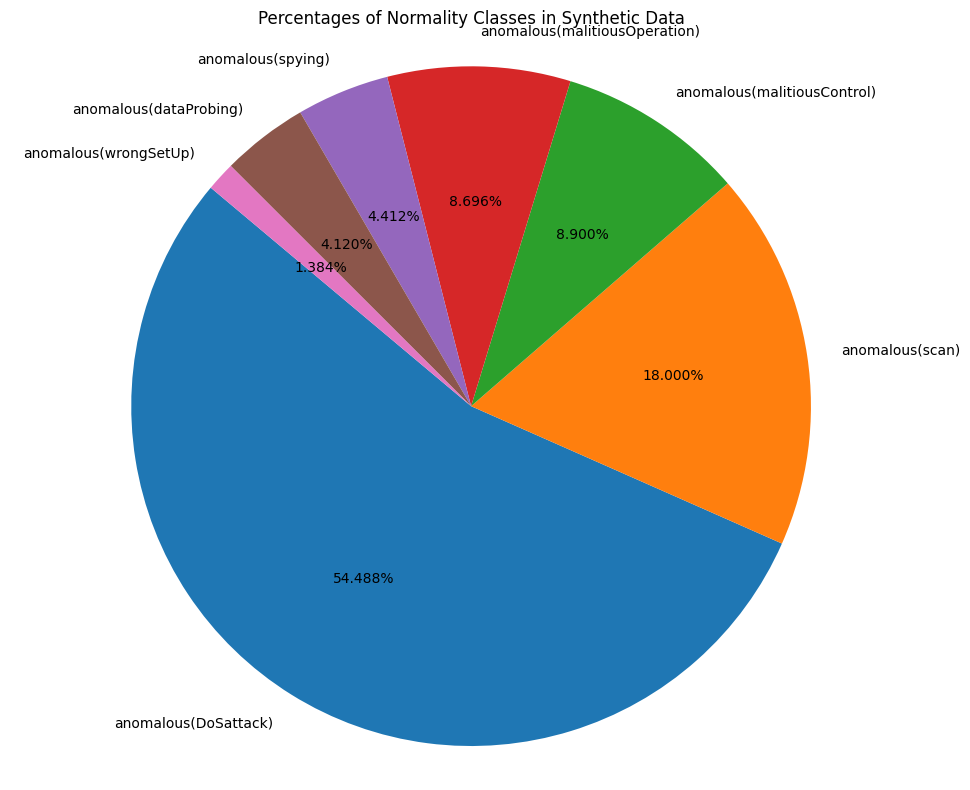

In [226]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = synthetic_data1['normality'].value_counts()
#normality_counts = data['normality'].value_counts()
# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


Percentages of values in the 'normality' column:
7: 77.802%
0: 28.488%
4: 9.362%
2: 4.648%
3: 4.534%
5: 2.310%
1: 2.136%
6: 0.720%


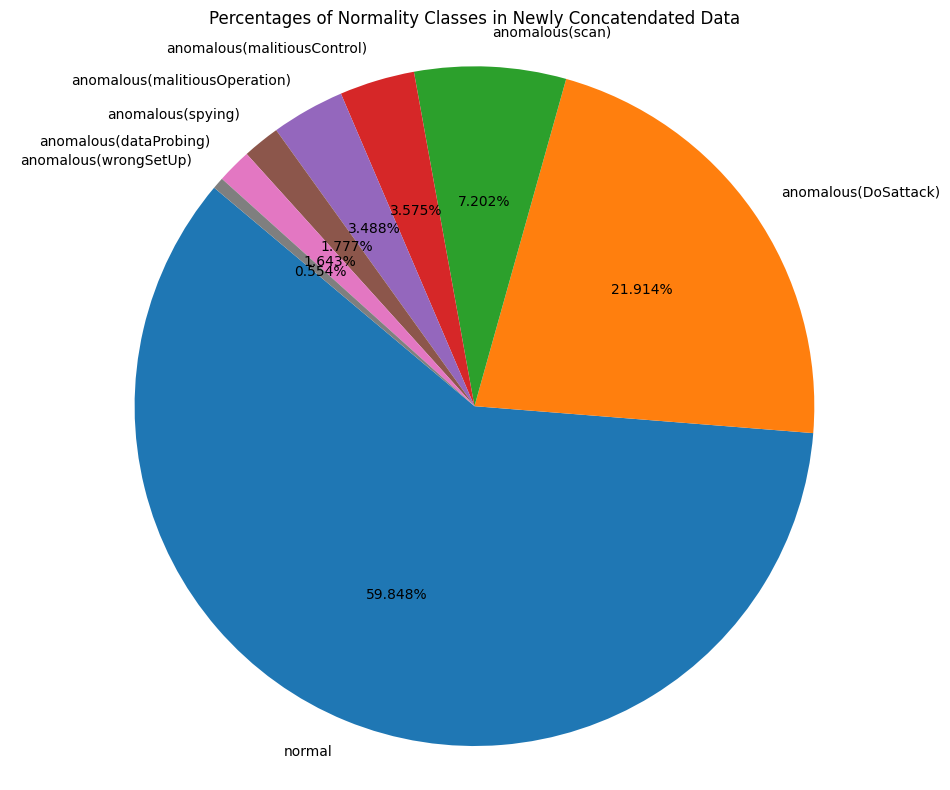

In [227]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Newly Concatendated Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


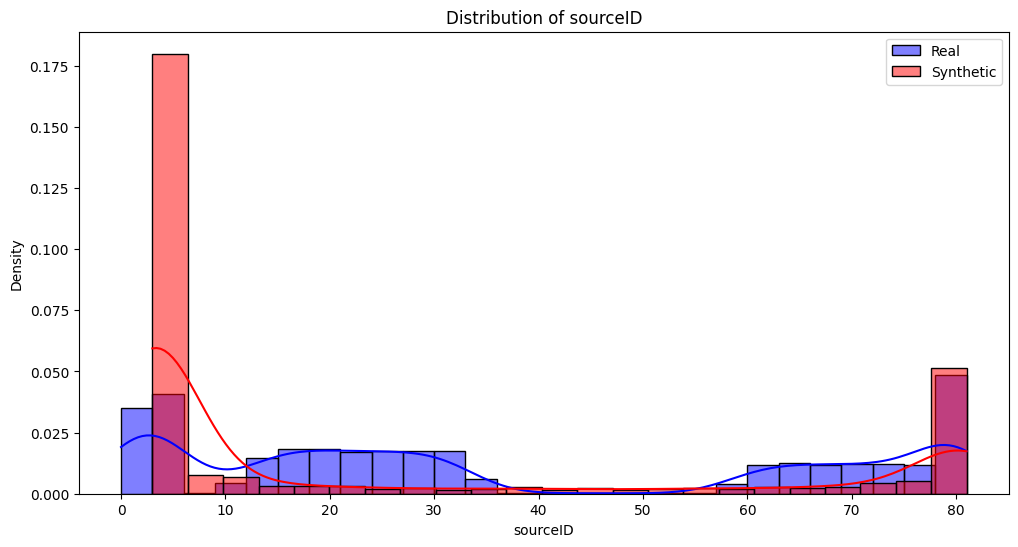

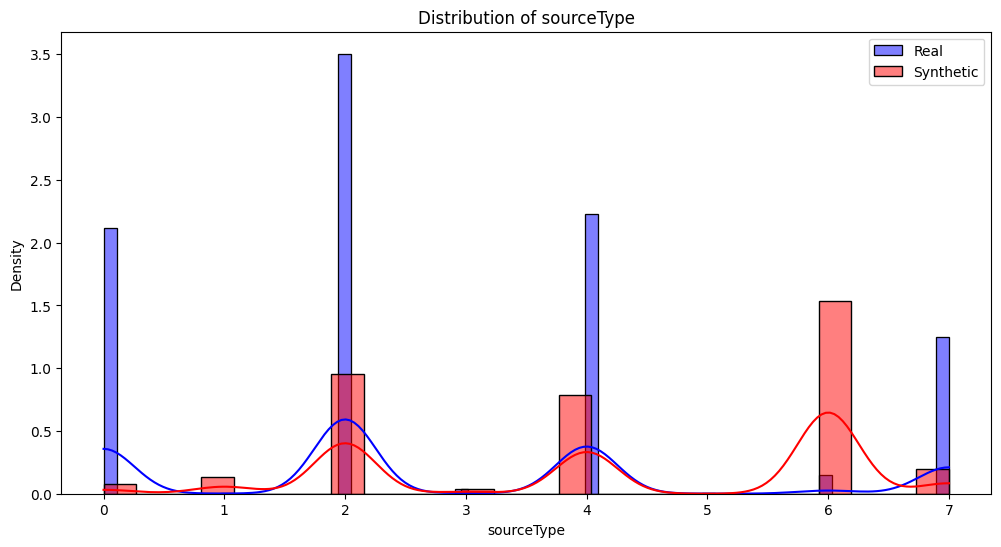

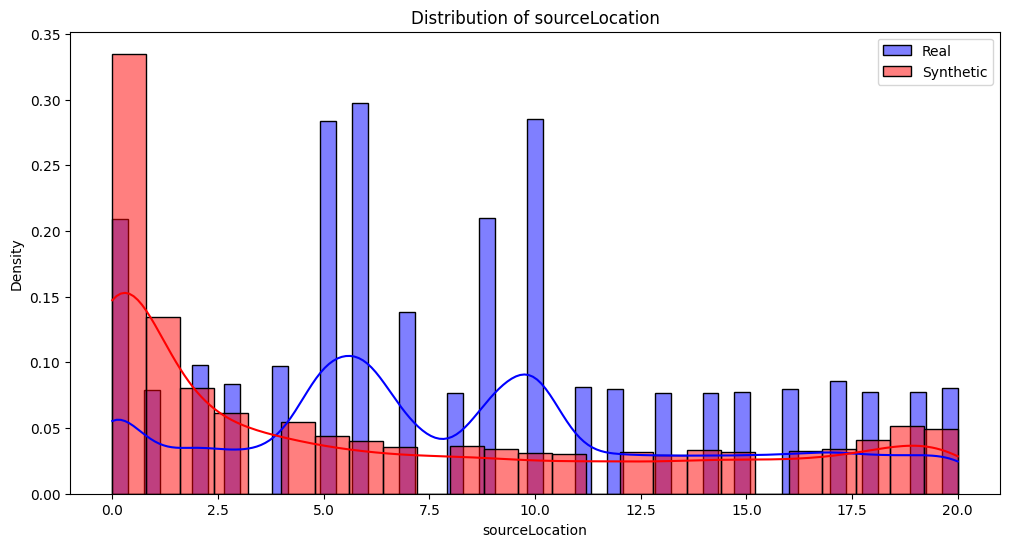

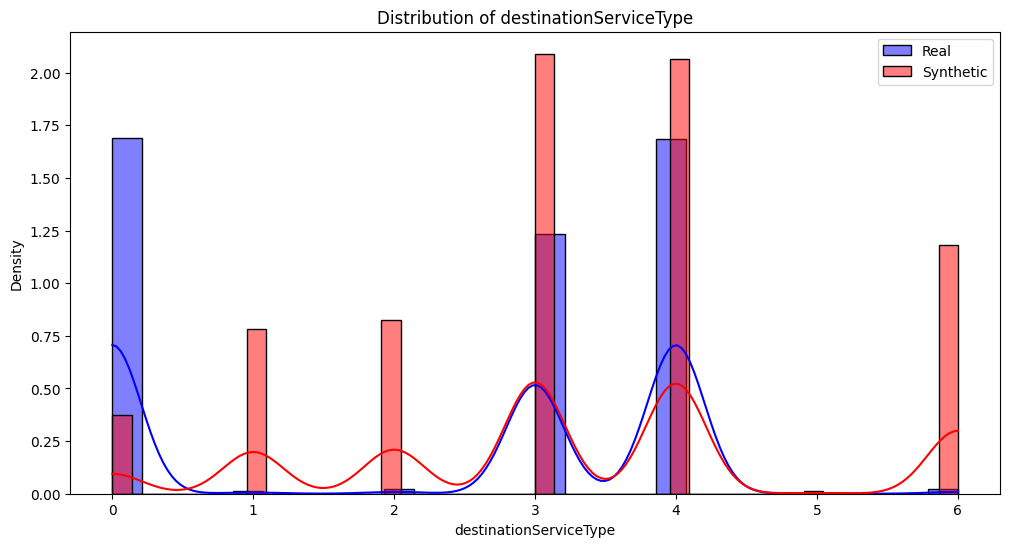

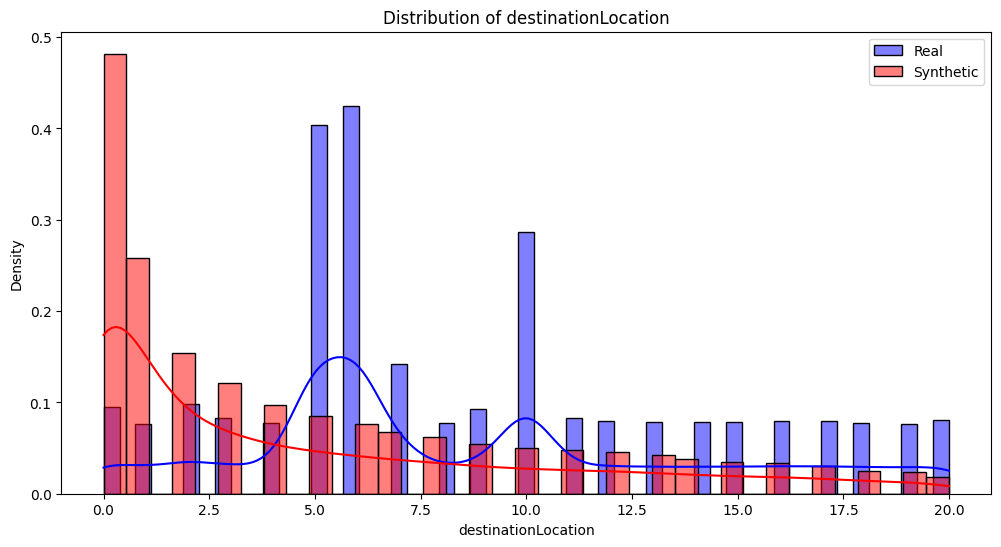

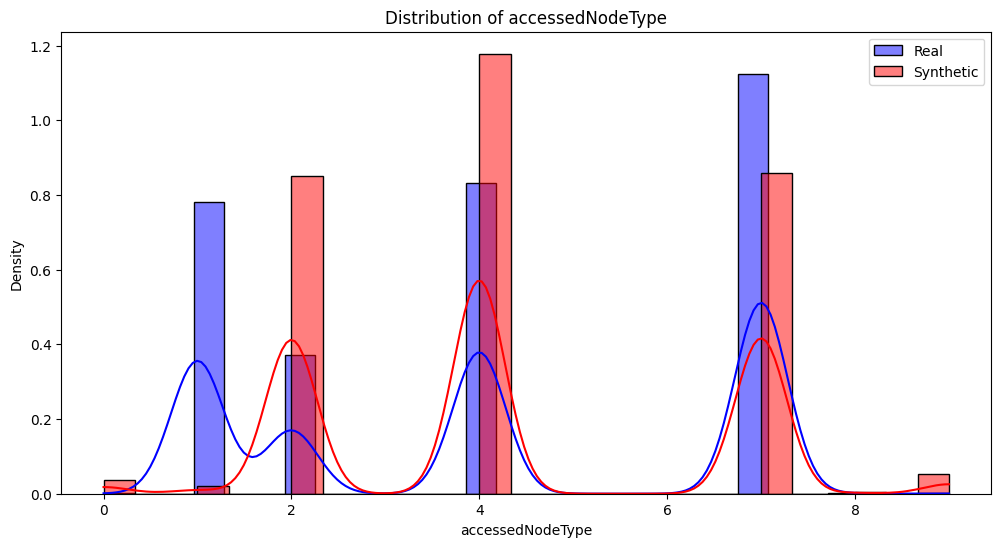

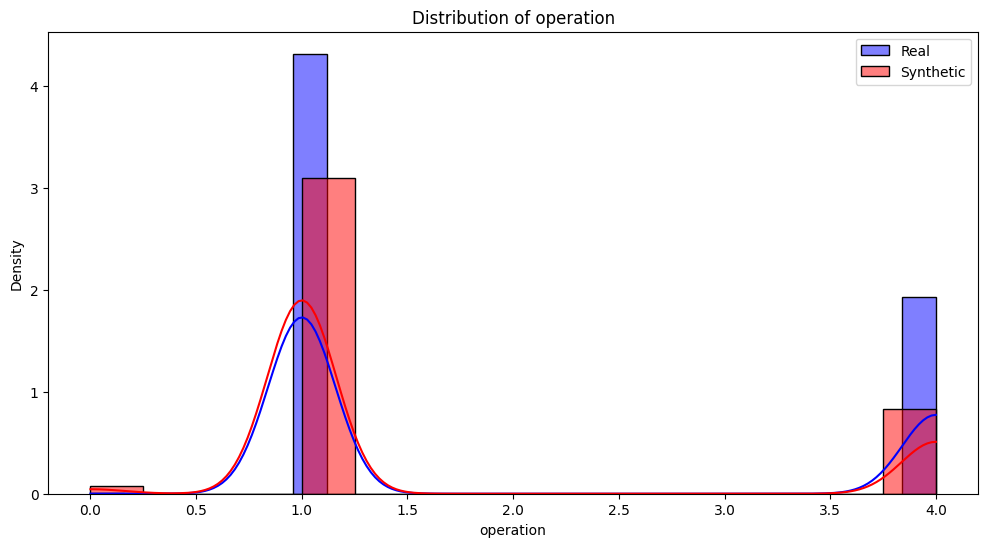

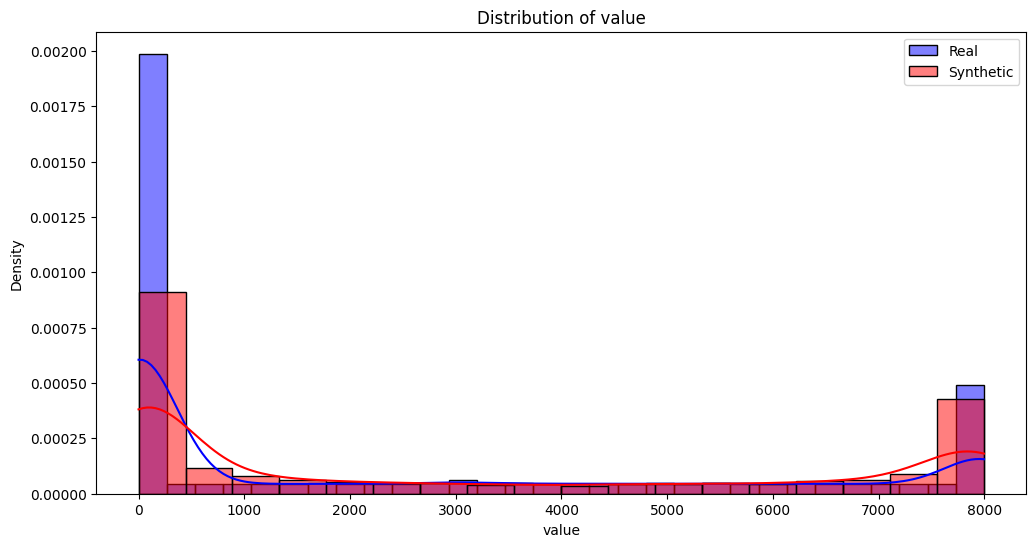

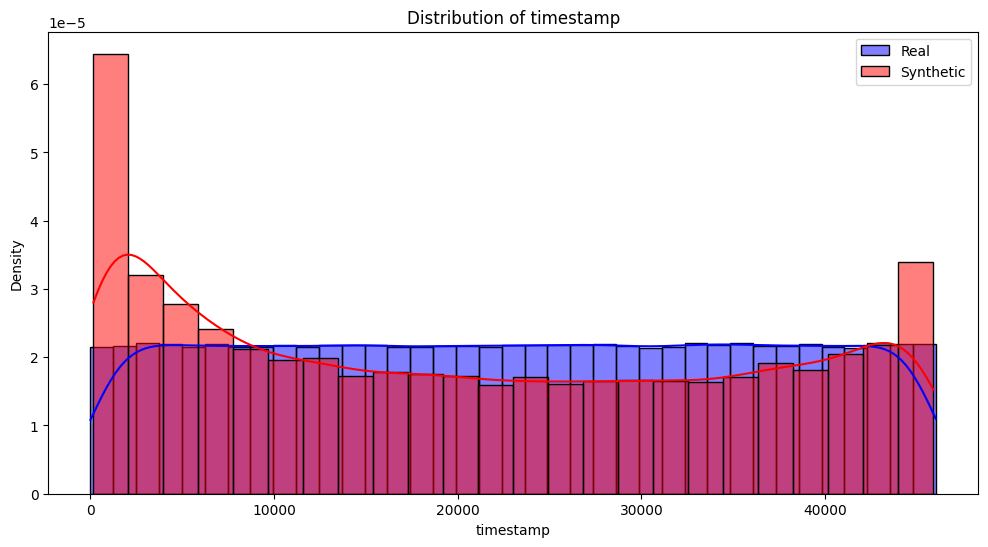

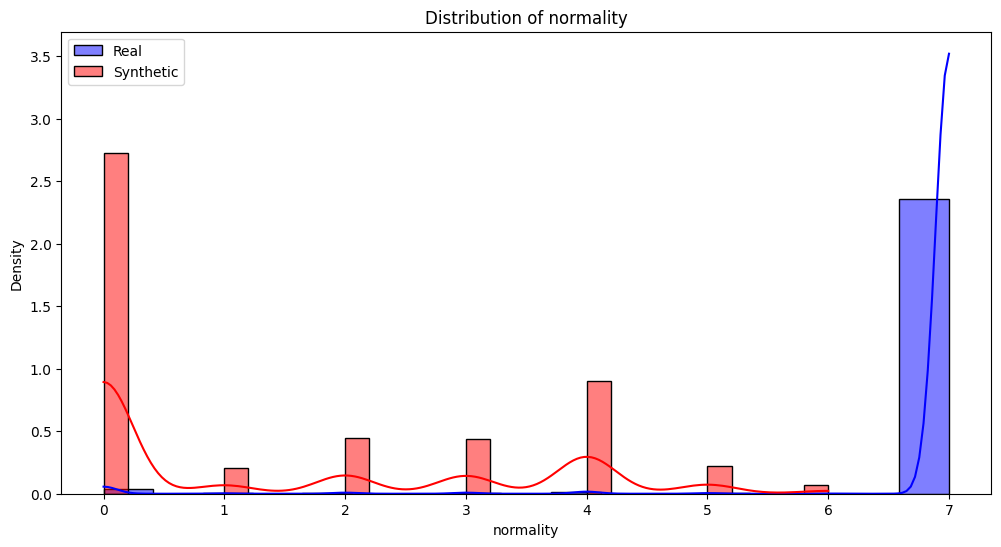

In [228]:
for column in real_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(real_data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_data1[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.legend()
    plt.title(f'Distribution of {column}')
    plt.show()

## APPLYING CTGANSynthesizer

In [229]:
from sdv.single_table import CTGANSynthesizer

synthesizer_ct1 = CTGANSynthesizer(metadata)
synthesizer_ct1.fit(X_simulation[X_simulation.normality!=7])


synthetic_data_ct1 = synthesizer_ct1.sample(num_rows=35000)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



In [230]:
synthesizer_ct1.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 300,
 'pac': 10,
 'enable_gpu': True}

In [231]:
def calculate_statistics(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    mean_values = numeric_df.mean()
    median_values = numeric_df.median()
    mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, so take the first row

    return mean_values, median_values, mode_values

def create_summary_table(df, dataset_name):
    mean, median, mode = calculate_statistics(df)

    summary_df = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Mode': mode
    })

    summary_df.index.name = dataset_name
    return summary_df

# Create summary tables for real data
summary_table_real1 = create_summary_table(real_data, 'real_data')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data_ct1, 'synthetic_data_ct1')


# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])

# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)


Combined Summary Table for Dataset 1
                                          Mean   Median    Mode
          real_data                                            
Real      sourceID                   36.662500     27.0    79.0
          sourceType                  2.761640      2.0     2.0
          sourceLocation              8.575040      8.0     6.0
          destinationServiceType      2.280820      3.0     0.0
          destinationLocation         8.670080      7.0     6.0
          accessedNodeType            4.095460      4.0     7.0
          operation                   1.926060      1.0     1.0
          value                    2402.320540     16.0     1.0
          timestamp               23036.971680  23055.5  3619.0
          normality                   6.846780      7.0     7.0
Synthetic sourceID                   41.395943     50.0    81.0
          sourceType                  4.287200      4.0     4.0
          sourceLocation              5.843286      5.0     0.0
   

In [232]:
synthesizer_ct1.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,1.857518,0.003158
1,1,1.845169,-0.037356
2,2,1.763251,-0.042873
3,3,1.800108,-0.052155
4,4,1.745472,-0.048960
...,...,...,...
295,295,-0.362552,-1.183649
296,296,-0.458151,-0.878231
297,297,-0.446633,-0.945168
298,298,-0.456811,-0.899956


In [233]:
fig1 = synthesizer_ct1.get_loss_values_plot()
fig1.show()

## Checking the quality

In [234]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_ct1 = evaluate_quality(
    real_data,
    synthetic_data_ct1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 104.45it/s]|
Column Shapes Score: 64.41%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 326.13it/s]|
Column Pair Trends Score: 32.0%

Overall Score (Average): 48.2%



In [235]:
quality_report_ct1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.803880
1,sourceType,TVComplement,0.603691
2,sourceLocation,KSComplement,0.716686
3,destinationServiceType,TVComplement,0.629263
4,destinationLocation,KSComplement,0.755529
5,accessedNodeType,TVComplement,0.603509
6,operation,TVComplement,0.816311
7,value,KSComplement,0.595260
8,timestamp,KSComplement,0.888829
9,normality,TVComplement,0.027620


## visualizing the synthethic data

In [236]:
quality_report_ct1.get_visualization('Column Shapes')


In [237]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data_ct1,
    column_name='normality',
    metadata=metadata
)

fig.show()

In [238]:
data=pd.concat([X_simulation,synthetic_data_ct1],axis=0)
#synthetic_data1.head()
data.shape

(75000, 10)

## Applying ML algorithms to test the accuracy

In [239]:
target_variable = 'normality'

In [240]:
# Ashutosh

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns


X = data.drop(columns=['normality'])
y = data[target_variable]



# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.508733   0.336248  0.508733
1             Naive Bayes  0.532067   0.424570  0.532067
2           Decision Tree  0.636667   0.636641  0.636667
3           Random Forest  0.678667   0.658733  0.678667
4                AdaBoost  0.568333   0.443975  0.568333
5       Gradient Boosting  0.676733   0.646419  0.676733
6     K-Nearest Neighbors  0.512933   0.459368  0.512933
7  Support Vector Machine  0.521867   0.272345  0.521867
8          SGD Classifier  0.516600   0.349044  0.516600
9      Bagging Classifier  0.663133   0.645487  0.663133


In [241]:
# Calculate value counts of 'normality' column
#normality_counts = synthetic_data_ct1['normality'].value_counts()
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
7: 77.802%
0: 20.498%
4: 13.782%
3: 12.636%
2: 11.192%
1: 6.808%
5: 5.114%
6: 2.168%


Percentages of values in the 'normality' column:
7: 77.802%
0: 20.498%
4: 13.782%
3: 12.636%
2: 11.192%
1: 6.808%
5: 5.114%
6: 2.168%


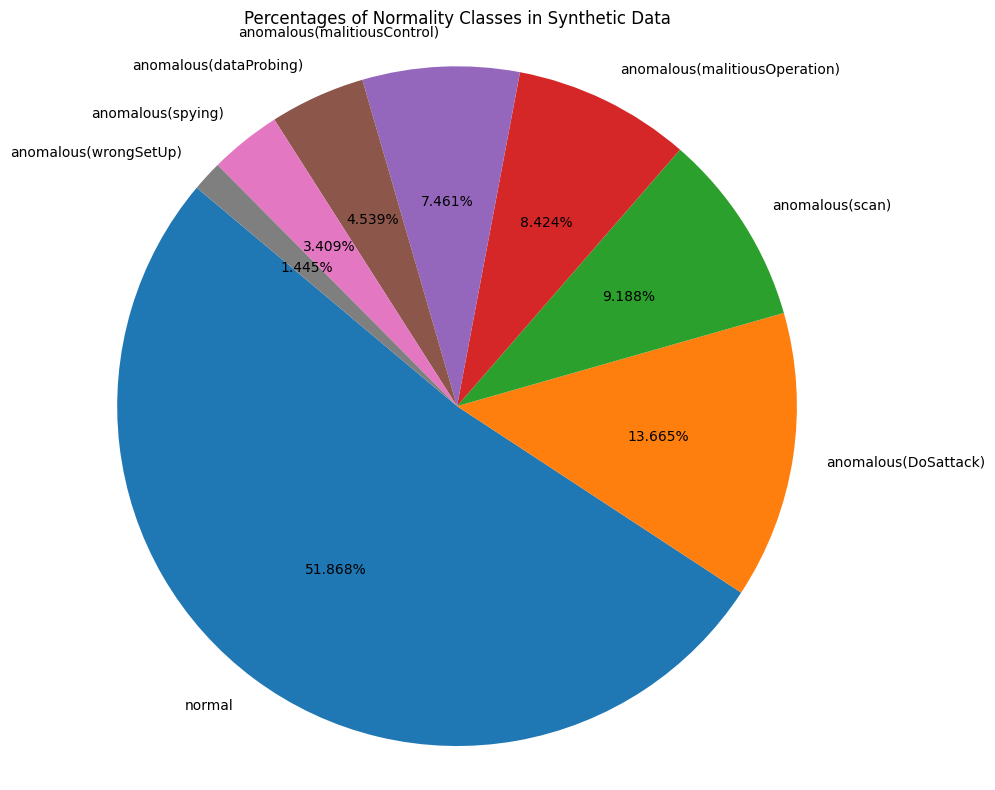

In [242]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
#normality_counts = synthetic_data_ct1['normality'].value_counts()
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


Percentages of values in the 'normality' column:
7: 77.802%
0: 20.498%
4: 13.782%
3: 12.636%
2: 11.192%
1: 6.808%
5: 5.114%
6: 2.168%


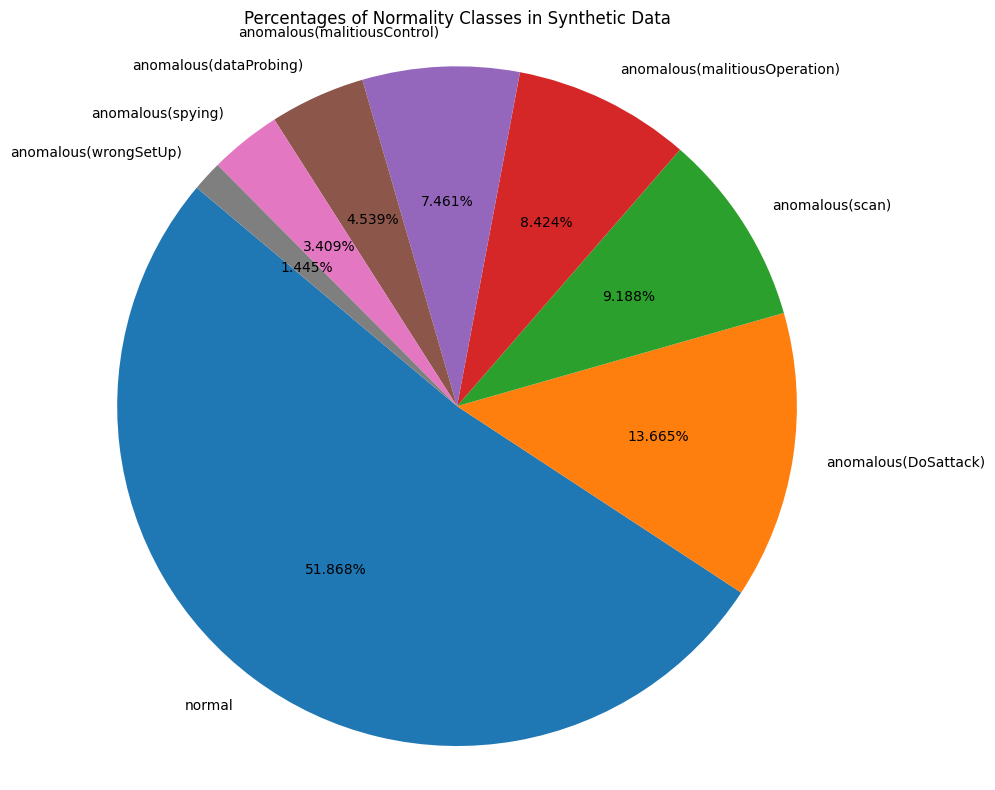

In [243]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


### Original Data Percentages

normal (7): 97.342%

anomalous(DoSattack) (0): 1.560%

anomalous(scan) (4): 0.372%

anomalous(malitiousControl) (2): 0.216%

anomalous(malitiousOperation) (3): 0.198%

anomalous(spying) (5): 0.172%

anomalous(dataProbing) (1): 0.112%

anomalous(wrongSetUp) (6): 0.028%

### Synthetic Data Percentages

normal (7): 97.222%

anomalous(DoSattack) (0): 1.594%

anomalous(scan) (4): 0.422%

anomalous(malitiousControl) (2): 0.224%

anomalous(malitiousOperation) (3): 0.186%

anomalous(spying) (5): 0.192%

anomalous(dataProbing) (1): 0.132%

anomalous(wrongSetUp) (6): 0.028%

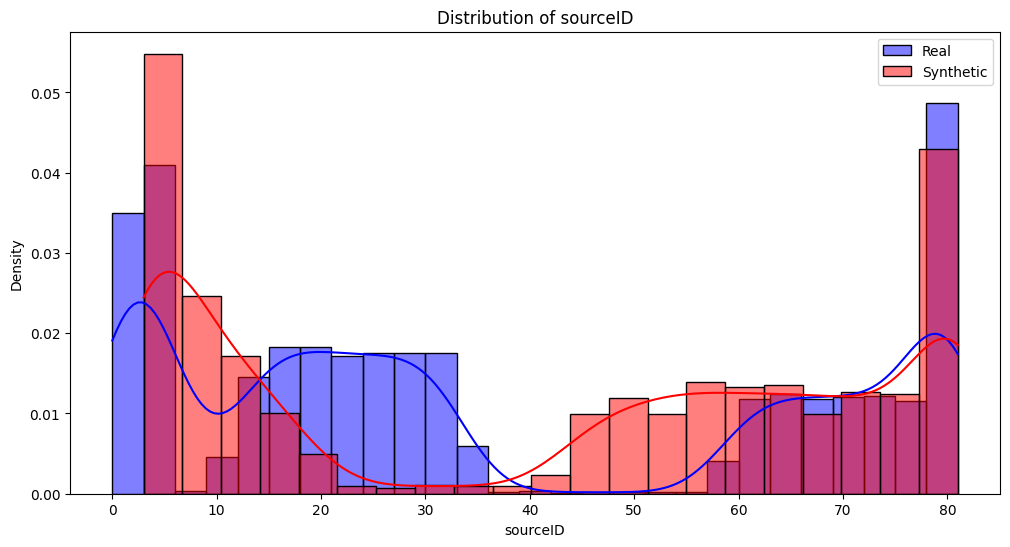

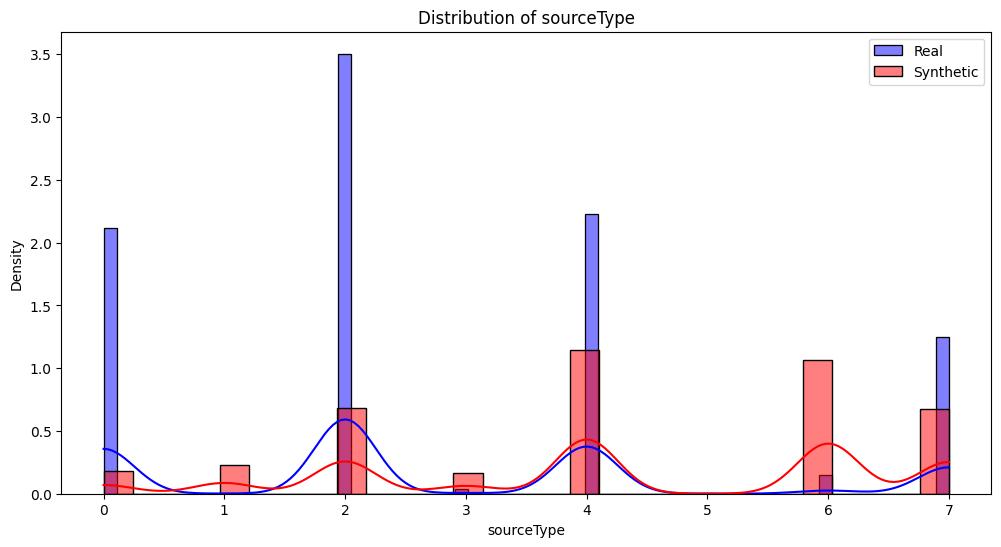

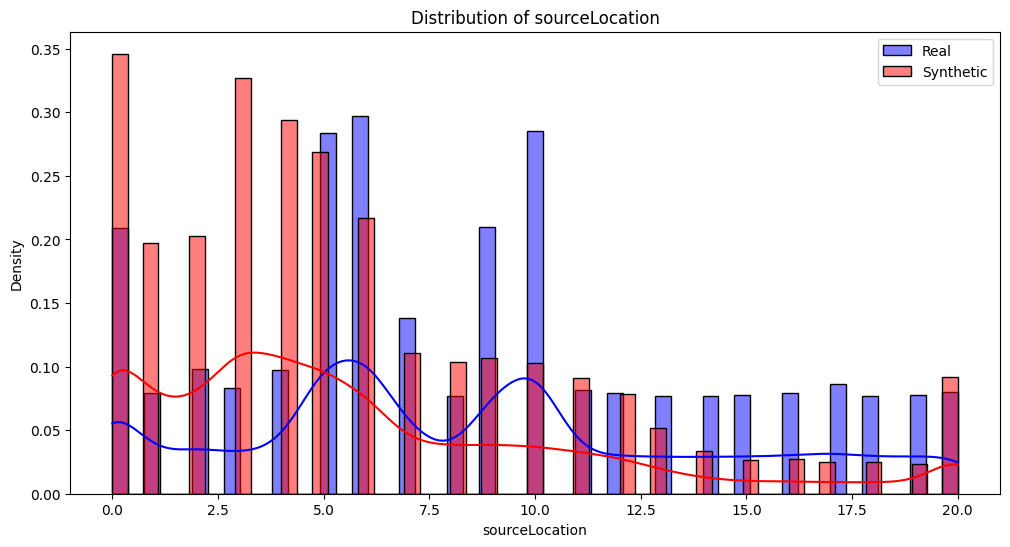

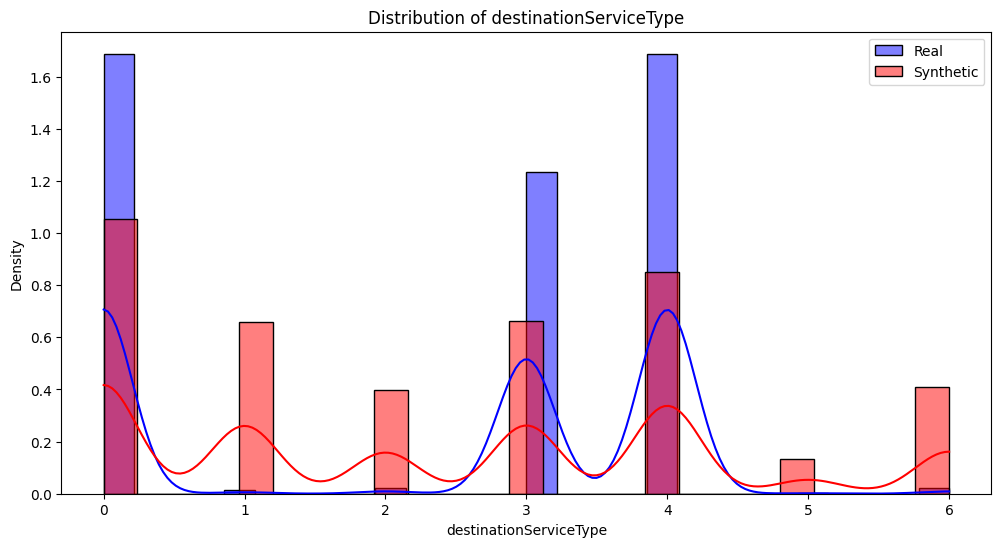

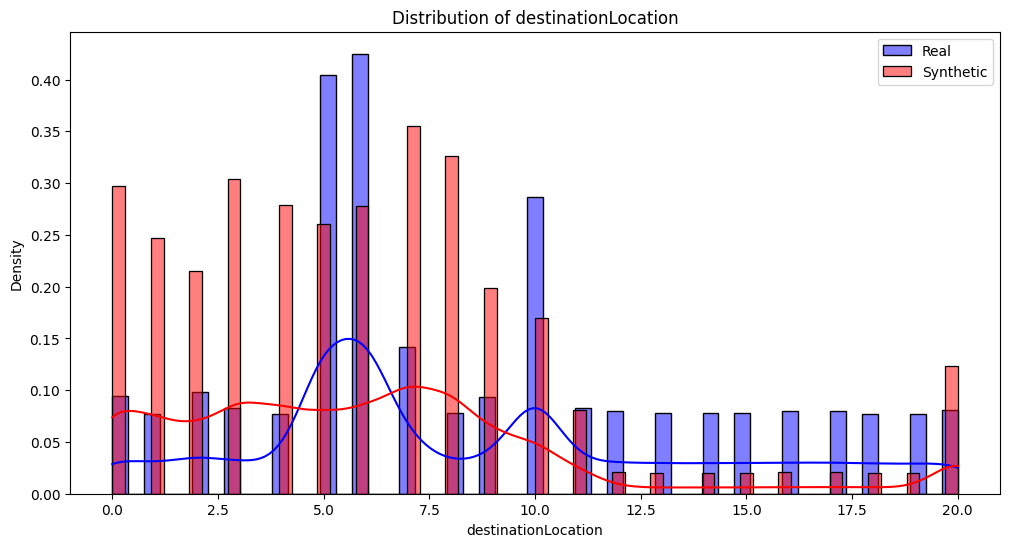

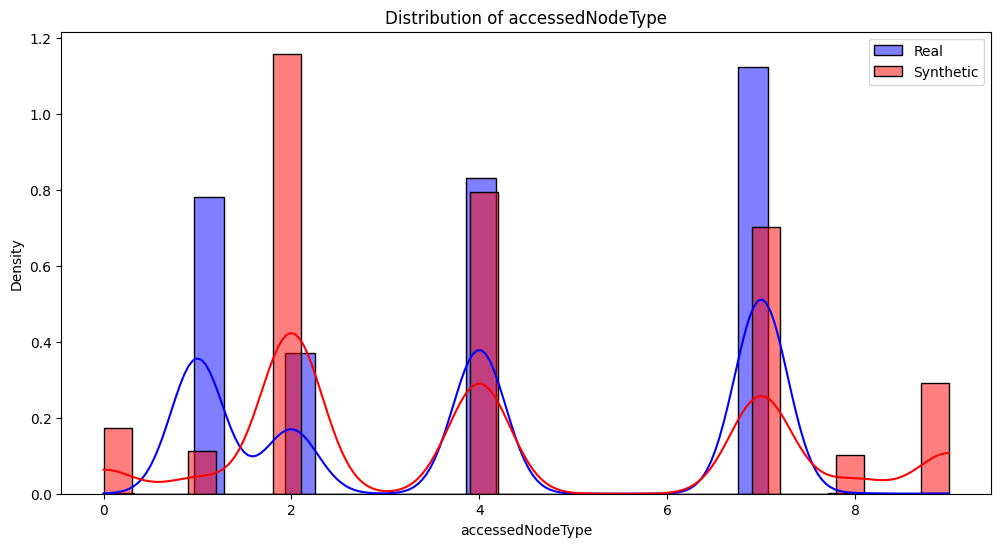

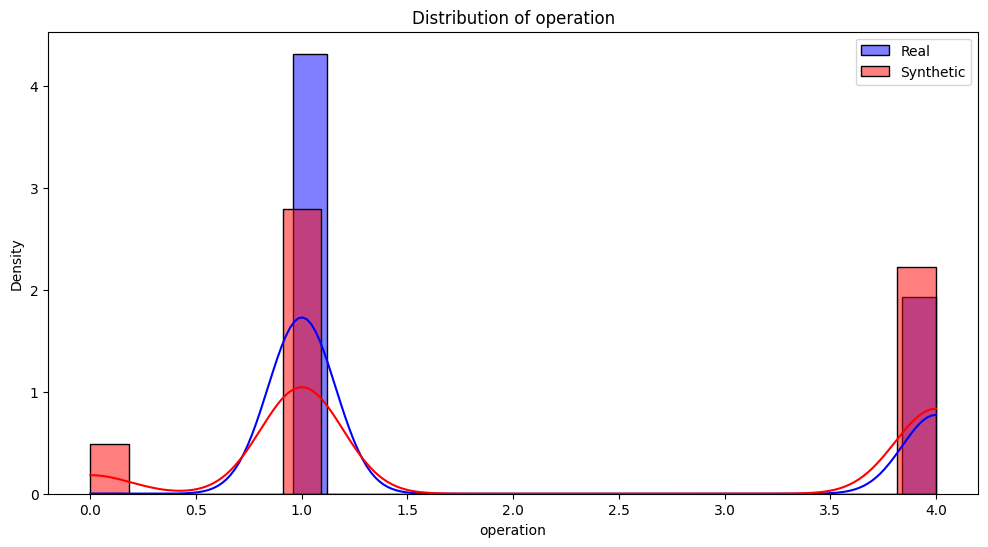

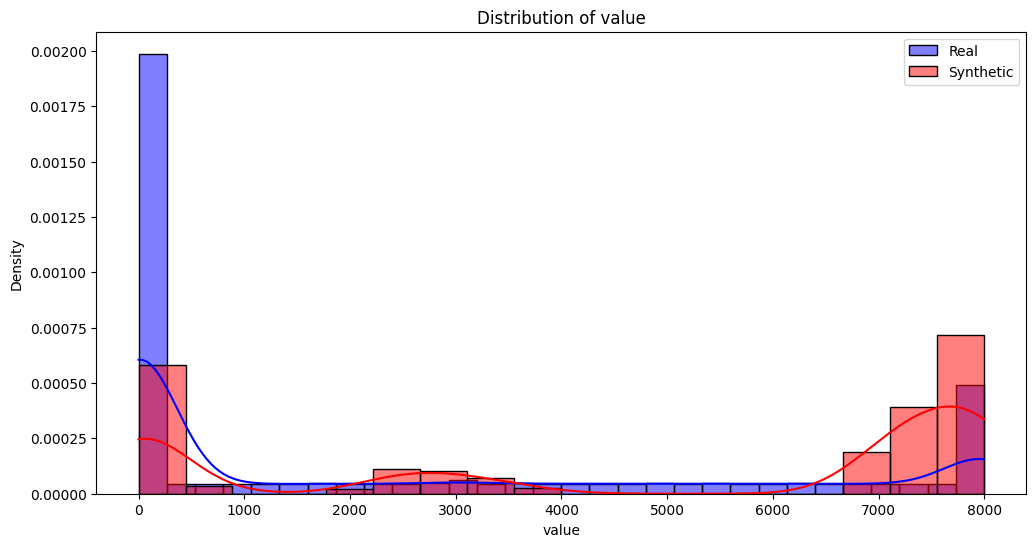

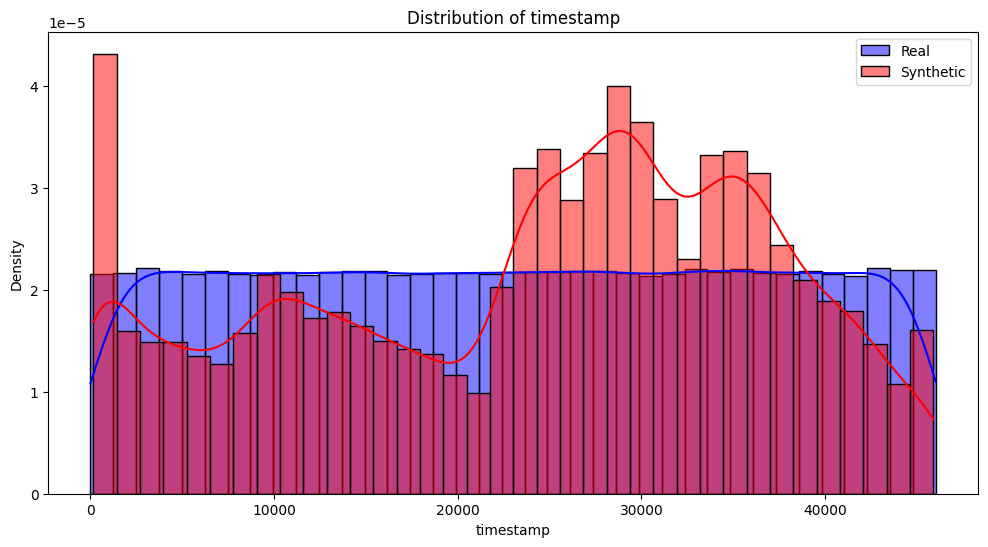

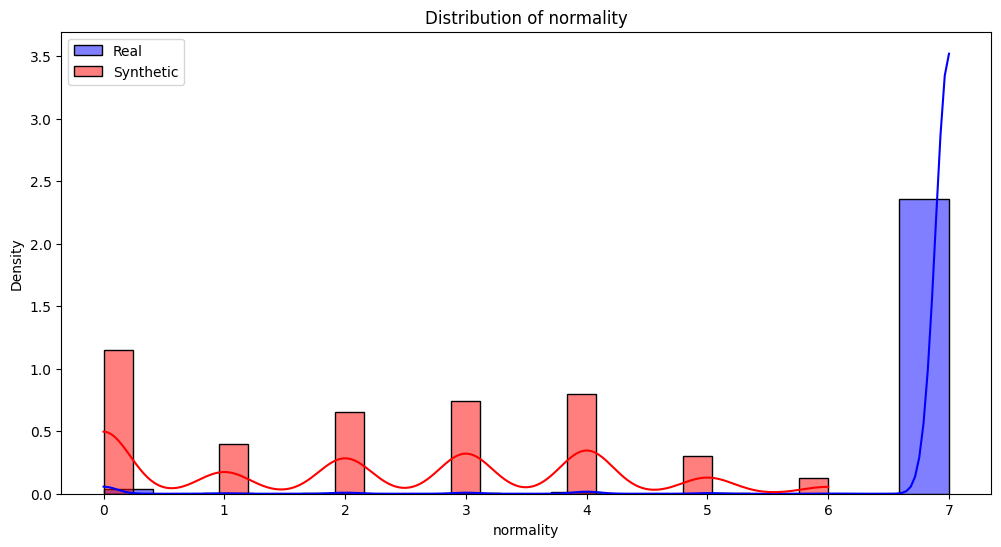

In [244]:
for column in real_data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(real_data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_data_ct1[column], color='red', label='Synthetic', kde=True, stat="density")
    plt.legend()
    plt.title(f'Distribution of {column}')
    plt.show()

## Applying TVAE syntetizer

In [245]:
from sdv.single_table import TVAESynthesizer

synthesizer_tv1 = TVAESynthesizer(metadata)
synthesizer_tv1.fit(X_simulation[X_simulation.normality!=7])

synthetic_data_tv1 = synthesizer_tv1.sample(num_rows=40000)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



In [246]:
synthesizer_tv2 = CTGANSynthesizer(metadata)
synthesizer_tv2.fit(real_data[real_data.normality==7])
synthetic_data_tv2 = synthesizer_tv2.sample(num_rows=10000)
synthetic_data_tv2=pd.concat([synthetic_data_tv1,synthetic_data_tv2],axis=0)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



In [247]:
synthesizer_tv1.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'embedding_dim': 128,
 'compress_dims': (128, 128),
 'decompress_dims': (128, 128),
 'l2scale': 1e-05,
 'batch_size': 500,
 'verbose': False,
 'epochs': 300,
 'loss_factor': 2,
 'enable_gpu': True}

In [248]:
synthesizer_tv1.get_loss_values()

,Epoch,Batch,Loss
0,0,0,30.769045
1,0,1,28.329708
2,0,2,28.759235
3,1,0,27.938871
4,1,1,26.315161
...,...,...,...
895,298,1,-11.632113
896,298,2,-8.264030
897,299,0,-12.240652
898,299,1,-9.716438


In [249]:
from sdv.lite import SingleTablePreset
# Create summary tables for real data
summary_table_real1 = create_summary_table(real_data, 'real_data1')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data_tv1, 'synthetic_data_tv1')



# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])


# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)



Combined Summary Table for Dataset 1
                                          Mean   Median    Mode
          real_data1                                           
Real      sourceID                   36.662500     27.0    79.0
          sourceType                  2.761640      2.0     2.0
          sourceLocation              8.575040      8.0     6.0
          destinationServiceType      2.280820      3.0     0.0
          destinationLocation         8.670080      7.0     6.0
          accessedNodeType            4.095460      4.0     7.0
          operation                   1.926060      1.0     1.0
          value                    2402.320540     16.0     1.0
          timestamp               23036.971680  23055.5  3619.0
          normality                   6.846780      7.0     7.0
Synthetic sourceID                   21.935550     11.0    10.0
          sourceType                  4.269900      4.0     6.0
          sourceLocation              5.912600      4.0     4.0
   

In [250]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_tv1 = evaluate_quality(
    X_simulation,
    synthetic_data_tv1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 110.90it/s]|
Column Shapes Score: 60.66%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 330.68it/s]|
Column Pair Trends Score: 37.55%

Overall Score (Average): 49.1%



In [251]:
quality_report_tv1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.506325
1,sourceType,TVComplement,0.540275
2,sourceLocation,KSComplement,0.541425
3,destinationServiceType,TVComplement,0.630750
4,destinationLocation,KSComplement,0.642200
5,accessedNodeType,TVComplement,0.692400
6,operation,TVComplement,0.829025
7,value,KSComplement,0.864350
8,timestamp,KSComplement,0.791875
9,normality,TVComplement,0.027475


In [252]:
quality_report_tv1.get_visualization('Column Shapes')


In [253]:
data=pd.concat([X_simulation,synthetic_data_tv1],axis=0)
#synthetic_data1.head()
data.normality.value_counts()

normality
7    38901
0    25554
4     6843
3     3084
5     2522
2     2365
1      452
6      279
Name: count, dtype: int64

Percentages of values in the 'normality' column:
7: 77.802%
0: 51.108%
4: 13.686%
3: 6.168%
5: 5.044%
2: 4.730%
1: 0.904%
6: 0.558%


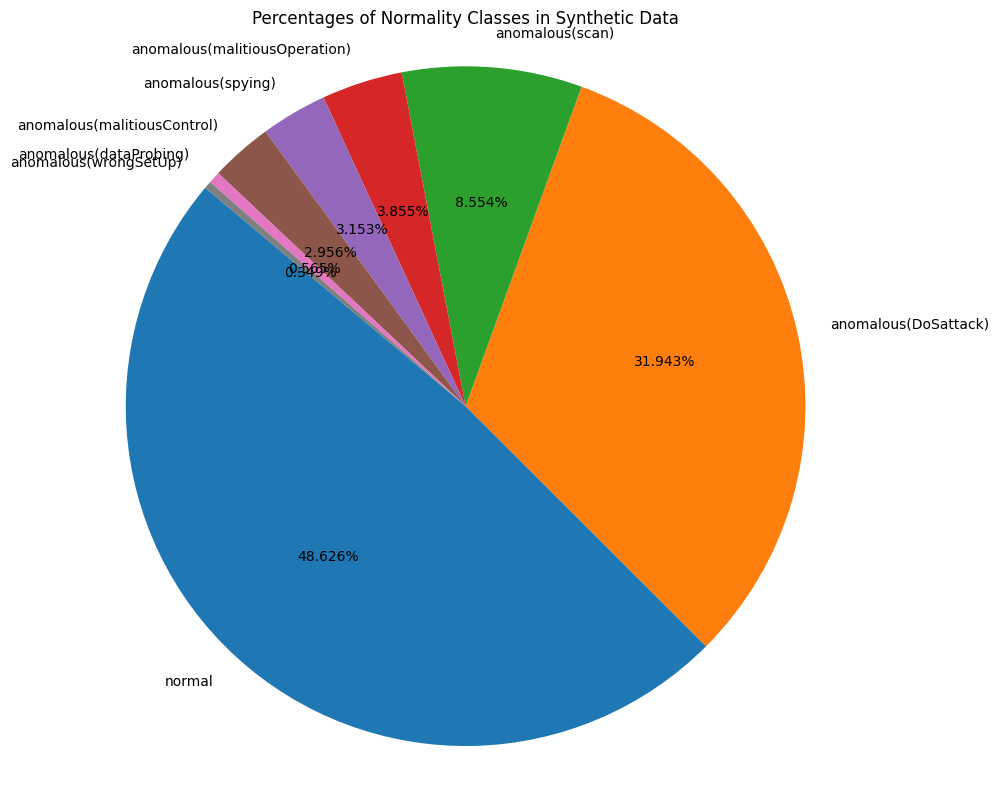

In [254]:
import matplotlib.pyplot as plt

# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

# Mapping of encoded values to original labels
labels = {
    7: 'normal',
    0: 'anomalous(DoSattack)',
    4: 'anomalous(scan)',
    2: 'anomalous(malitiousControl)',
    3: 'anomalous(malitiousOperation)',
    5: 'anomalous(spying)',
    1: 'anomalous(dataProbing)',
    6: 'anomalous(wrongSetUp)'
}

# Prepare labels and sizes for the pie chart
labels = [labels[idx] for idx in normality_counts.index]
sizes = normality_percentages.values

# Plotting pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=140)
plt.title('Percentages of Normality Classes in Synthetic Data')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Show plot
plt.tight_layout()
plt.show()


In [255]:
# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
7: 77.802%
0: 51.108%
4: 13.686%
3: 6.168%
5: 5.044%
2: 4.730%
1: 0.904%
6: 0.558%


In [256]:
# Ashutosh

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns


X = data.drop(columns=['normality'])
y = data[target_variable]



# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.570875   0.472307  0.570875
1             Naive Bayes  0.651375   0.786501  0.651375
2           Decision Tree  0.918000   0.918823  0.918000
3           Random Forest  0.939063   0.936575  0.939063
4                AdaBoost  0.857375   0.843781  0.857375
5       Gradient Boosting  0.939625   0.936821  0.939625
6     K-Nearest Neighbors  0.832625   0.812471  0.832625
7  Support Vector Machine  0.654687   0.540257  0.654687
8          SGD Classifier  0.344062   0.343234  0.344062
9      Bagging Classifier  0.933937   0.931125  0.933937


### Original Data Percentages

normal (7): 97.342%

anomalous(DoSattack) (0): 1.560%

anomalous(scan) (4): 0.372%

anomalous(malitiousControl) (2): 0.216%

anomalous(malitiousOperation) (3): 0.198%

anomalous(spying) (5): 0.172%

anomalous(dataProbing) (1): 0.112%

anomalous(wrongSetUp) (6): 0.028%

## Applying CopulaGANSynthesizer

In [257]:
from sdv.single_table import CTGANSynthesizer

synthesizer_cg1 = CTGANSynthesizer(metadata)
synthesizer_cg1.fit(X_simulation[X_simulation.normality!=7])


synthetic_data_cg1 = synthesizer_cg1.sample(num_rows=40000)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



In [258]:
synthesizer_cg2 = CTGANSynthesizer(metadata)
synthesizer_cg2.fit(real_data[real_data.normality==7])
synthetic_data_cg2 = synthesizer_cg2.sample(num_rows=10000)
synthetic_data_cg2=pd.concat([synthetic_data_cg2,synthetic_data_cg2],axis=0)

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



In [259]:
synthesizer_cg1.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'locales': ['en_US'],
 'embedding_dim': 128,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'generator_lr': 0.0002,
 'generator_decay': 1e-06,
 'discriminator_lr': 0.0002,
 'discriminator_decay': 1e-06,
 'batch_size': 500,
 'discriminator_steps': 1,
 'log_frequency': True,
 'verbose': False,
 'epochs': 300,
 'pac': 10,
 'enable_gpu': True}

In [260]:
# Create summary tables for real data
summary_table_real1 = create_summary_table(real_data, 'real_data1')


# Assuming the synthetic datasets are loaded
# Create summary tables for synthetic data
summary_table_synthetic1 = create_summary_table(synthetic_data_cg1, 'synthetic_data_cg1')


# Concatenate summary tables for comparison
summary_table_combined1 = pd.concat([summary_table_real1, summary_table_synthetic1], keys=['Real', 'Synthetic'])


# Display combined summary tables
print("Combined Summary Table for Dataset 1")
print(summary_table_combined1)



Combined Summary Table for Dataset 1
                                          Mean   Median    Mode
          real_data1                                           
Real      sourceID                   36.662500     27.0    79.0
          sourceType                  2.761640      2.0     2.0
          sourceLocation              8.575040      8.0     6.0
          destinationServiceType      2.280820      3.0     0.0
          destinationLocation         8.670080      7.0     6.0
          accessedNodeType            4.095460      4.0     7.0
          operation                   1.926060      1.0     1.0
          value                    2402.320540     16.0     1.0
          timestamp               23036.971680  23055.5  3619.0
          normality                   6.846780      7.0     7.0
Synthetic sourceID                   24.978925     11.0     3.0
          sourceType                  4.513775      6.0     6.0
          sourceLocation              5.631800      4.0     4.0
   

In [261]:
synthesizer_cg1.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,1.883767,-0.003776
1,1,1.857030,-0.010197
2,2,1.807246,-0.058421
3,3,1.824900,-0.062750
4,4,1.815054,-0.059156
...,...,...,...
295,295,-0.258191,-0.932812
296,296,-0.320777,-0.859508
297,297,-0.262577,-0.757300
298,298,-0.177910,-1.071966


In [262]:
fig1 = synthesizer_cg1.get_loss_values_plot()
fig1.show()


In [263]:
from sdv.evaluation.single_table import evaluate_quality

quality_report_cg1 = evaluate_quality(
    real_data,
    synthetic_data_cg1,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 95.29it/s]|
Column Shapes Score: 63.11%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:00<00:00, 313.93it/s]|
Column Pair Trends Score: 30.94%

Overall Score (Average): 47.02%



In [264]:
quality_report_cg1.get_details('Column Shapes')

,Column,Metric,Score
0,sourceID,KSComplement,0.664270
1,sourceType,TVComplement,0.535665
2,sourceLocation,KSComplement,0.632905
3,destinationServiceType,TVComplement,0.641145
4,destinationLocation,KSComplement,0.677700
5,accessedNodeType,TVComplement,0.696480
6,operation,TVComplement,0.922470
7,value,KSComplement,0.591980
8,timestamp,KSComplement,0.920480
9,normality,TVComplement,0.027620


In [265]:
quality_report_cg1.get_visualization('Column Shapes')

In [266]:
data=pd.concat([X_simulation,synthetic_data_cg1],axis=0)
#synthetic_data1.head()
data.normality.value_counts()

normality
7    38901
0    16655
3     6164
4     5561
2     4893
1     3759
5     2807
6     1260
Name: count, dtype: int64

In [267]:
# Ashutosh

# Convert categorical features to numeric using one-hot encoding or drop non-numeric columns


X = data.drop(columns=['normality'])
y = data[target_variable]



# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'SGD Classifier': SGDClassifier(),
    'Bagging Classifier': BaggingClassifier()
}

# Train and evaluate each model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.509437   0.338825  0.509437
1             Naive Bayes  0.564937   0.429476  0.564937
2           Decision Tree  0.626313   0.628646  0.626313
3           Random Forest  0.695187   0.653311  0.695187
4                AdaBoost  0.599187   0.419090  0.599187
5       Gradient Boosting  0.697500   0.640936  0.697500
6     K-Nearest Neighbors  0.530250   0.472046  0.530250
7  Support Vector Machine  0.485563   0.300980  0.485563
8          SGD Classifier  0.149125   0.436871  0.149125
9      Bagging Classifier  0.671188   0.635934  0.671188


In [268]:
# Calculate value counts of 'normality' column
normality_counts = data['normality'].value_counts()

# Calculate percentages
normality_percentages = normality_counts / len(sampled_data) * 100

# Print percentages in text format
print("Percentages of values in the 'normality' column:")
for idx, value in normality_percentages.items():
    print(f"{idx}: {value:.3f}%")

Percentages of values in the 'normality' column:
7: 77.802%
0: 33.310%
3: 12.328%
4: 11.122%
2: 9.786%
1: 7.518%
5: 5.614%
6: 2.520%


### Original Data Percentages

normal (7): 97.342%

anomalous(DoSattack) (0): 1.560%

anomalous(scan) (4): 0.372%

anomalous(malitiousControl) (2): 0.216%

anomalous(malitiousOperation) (3): 0.198%

anomalous(spying) (5): 0.172%

anomalous(dataProbing) (1): 0.112%

anomalous(wrongSetUp) (6): 0.028%

## Applying SingleTablePreset

In [269]:
from sdv.lite import SingleTablePreset

In [270]:
synthesizer_st = SingleTablePreset(metadata, name='FAST_ML')
synthesizer_st.fit(real_data)

synthetic_data = synthesizer_st.sample(num_rows=50000)


/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:52: FutureWarning:

The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:61: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:88: FutureWarning:

The 'SingleTablePreset' is deprecated. For equivalent Fast ML functionality, please use the 'GaussianCopulaSynthesizer'.

/Users/tridhatri/anaconda3/envs/sdv-fresh/lib/python3.10/site-packages/sdv/lite/single_table.py:109